### IMPORT PACKAGE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
sys.path.append('./src/analysis')
sys.path.append('./src/data_handling')
sys.path.append('./src/modeling')
sys.path.append('./src/prediction')
sys.path.append('./src/visualization')


In [2]:
from analyzer import FeatureAnalyzer
from selector import FeatureSelector
from aggregator import DataAggregator
from feature_engineer import BatteryFeatureEngineer
from reader import BatteryDataReader
from cross_validator import CrossValidator
from evaluator import ModelEvaluator
from trainer import ModelTrainer
from predictor import Predictor
from visualizer import ResultVisualizer


## READ DATASET AND EXPLORE DATA ANALYSIS FROM RAW DATA

In [3]:
dir_data = './dataset'
battery_id = 'B0006'
df_battery_b0005 = BatteryDataReader(battery_id, dir_data)

# Load data
df_battery_b0005.load_data()
# Get raw data
df_capacity_b5, df_charge_b5, df_discharge_b5 = df_battery_b0005.get_raw_data()



--- Loading data for battery: B0006 ---
  Successfully loaded: capacity_B0006.csv
  Successfully loaded: charge_B0006.csv
  Successfully loaded: discharge_B0006.csv
--- Data loading process completed for B0006 ---


# Feature Engineering with raw data

In [4]:
fe_b5 = BatteryFeatureEngineer(
    battery_id=battery_id,
    capacity_df=df_capacity_b5,
    charge_df=df_charge_b5,
    discharge_df=df_discharge_b5
)

# Operata process feature engineering
fe_b5.process()
process_data_b5 = fe_b5.get_processed_data()



  Ensuring numeric types for B0006...
--- Starting Feature Engineering process for B0006 ---
  Calculating SOH/RUL for B0006...
  Engineering discharge features for B0006...


  Engineering charge features for B0006...


  Merging features for B0006...
  Handling NaNs for B0006...
--- Feature Engineering process finished for B0006 ---


In [8]:
fe_b5.get_all_name_feature()

['SOH',
 'RUL',
 'capacity',
 'Discharge_V_median',
 'Discharge_V_skew',
 'Discharge_T_delta',
 'Discharge_T_std',
 'Charge_T_std',
 'Time_CC_phase',
 'Time_CV_phase',
 'CV_I_end']

In [13]:
fe_b5.get_all_name_feature()

['SOH',
 'RUL',
 'capacity',
 'Discharge_V_median',
 'Discharge_V_skew',
 'Discharge_T_delta',
 'Discharge_T_std',
 'Charge_T_std',
 'Time_CC_phase',
 'Time_CV_phase',
 'CV_I_end']

In [14]:
f1 = 'Discharge_V_median'
f2 = 'Discharge_V_skew'
f3 = 'Discharge_T_delta'
f4 = 'Discharge_T_std'
f5 = 'Charge_T_std'
f6 = 'Time_CC_phase'
f7 = 'Time_CV_phase'


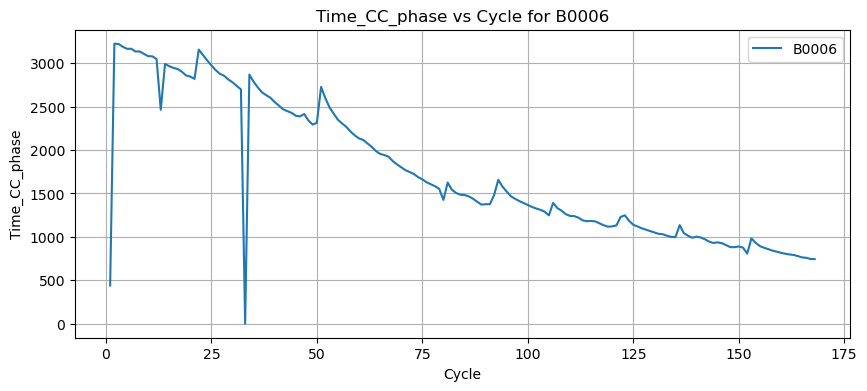

In [15]:
# Visualization feature
fe_b5.plot_feature_vs_cycle('Time_CC_phase')

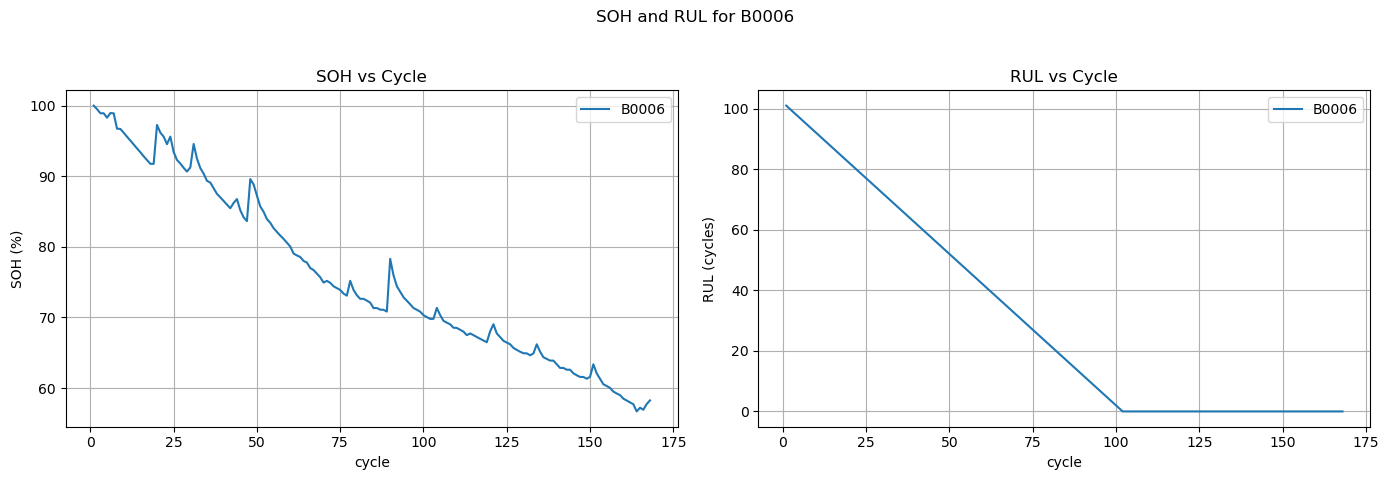

In [16]:
fe_b5.plot_soh_rul()

# Aggregation all data --> One dataFrame for model

In [5]:
battery_ids = ['B0005', 'B0006', 'B0007', 'B0018']
ACTUAL_DATA_DIR = "./dataset/"

# Update config for feature engineering
fe_configuration = {
    # Update config
}

# Init object
aggregator_df = DataAggregator(
    battery_ids=battery_ids,
    data_dir=ACTUAL_DATA_DIR,
    fe_config=fe_configuration
)



In [6]:
# Aggregator data
aggregator_df.aggregate(force_rerun=True)

# Get data aggregator
df_combined = aggregator_df.get_combined_data()

# Check data combined
df_combined.head()


--- Starting Data Aggregation for Batteries: ['B0018', 'B0005', 'B0006', 'B0007'] ---


Aggregating Batteries:   0%|          | 0/4 [00:00<?, ?it/s]


--- Processing: B0018 ---
--- Loading data for battery: B0018 ---
  Successfully loaded: capacity_B0018.csv
  Successfully loaded: charge_B0018.csv
  Successfully loaded: discharge_B0018.csv
--- Data loading process completed for B0018 ---
  Ensuring numeric types for B0018...
--- Starting Feature Engineering process for B0018 ---
  Calculating SOH/RUL for B0018...
    Note: Battery B0018 did not reach EoL threshold (1.30 Ah). Using 133 for RUL.
  Engineering discharge features for B0018...


  Engineering charge features for B0018...


Aggregating Batteries:  25%|██▌       | 1/4 [00:00<00:01,  2.01it/s]

  Merging features for B0018...
  Handling NaNs for B0018...
--- Feature Engineering process finished for B0018 ---
  Successfully processed B0018. Shape: (132, 13)

--- Processing: B0005 ---
--- Loading data for battery: B0005 ---
  Successfully loaded: capacity_B0005.csv
  Successfully loaded: charge_B0005.csv
  Successfully loaded: discharge_B0005.csv
--- Data loading process completed for B0005 ---
  Ensuring numeric types for B0005...
--- Starting Feature Engineering process for B0005 ---
  Calculating SOH/RUL for B0005...
  Engineering discharge features for B0005...


  Engineering charge features for B0005...


Aggregating Batteries:  50%|█████     | 2/4 [00:01<00:01,  1.68it/s]

  Merging features for B0005...
  Handling NaNs for B0005...
--- Feature Engineering process finished for B0005 ---
  Successfully processed B0005. Shape: (168, 13)

--- Processing: B0006 ---
--- Loading data for battery: B0006 ---
  Successfully loaded: capacity_B0006.csv
  Successfully loaded: charge_B0006.csv
  Successfully loaded: discharge_B0006.csv
--- Data loading process completed for B0006 ---
  Ensuring numeric types for B0006...
--- Starting Feature Engineering process for B0006 ---
  Calculating SOH/RUL for B0006...
  Engineering discharge features for B0006...


  Engineering charge features for B0006...


Aggregating Batteries:  75%|███████▌  | 3/4 [00:01<00:00,  1.58it/s]

  Merging features for B0006...
  Handling NaNs for B0006...
--- Feature Engineering process finished for B0006 ---
  Successfully processed B0006. Shape: (168, 13)

--- Processing: B0007 ---
--- Loading data for battery: B0007 ---
  Successfully loaded: capacity_B0007.csv
  Successfully loaded: charge_B0007.csv
  Successfully loaded: discharge_B0007.csv
--- Data loading process completed for B0007 ---
  Ensuring numeric types for B0007...
--- Starting Feature Engineering process for B0007 ---
  Calculating SOH/RUL for B0007...
    Note: Battery B0007 did not reach EoL threshold (1.32 Ah). Using 169 for RUL.
  Engineering discharge features for B0007...


  Engineering charge features for B0007...


Aggregating Batteries: 100%|██████████| 4/4 [00:02<00:00,  1.51it/s]

  Merging features for B0007...
  Handling NaNs for B0007...
--- Feature Engineering process finished for B0007 ---
  Successfully processed B0007. Shape: (168, 13)


Aggregating Batteries: 100%|██████████| 4/4 [00:02<00:00,  1.57it/s]


--- Concatenating data from all processed batteries ---
Combined DataFrame shape: (636, 13)
Unique batteries in combined data: ['B0018' 'B0005' 'B0006' 'B0007']

--- Performing final NaN check and fill on combined data ---
No NaNs found in the combined data after individual processing.
--- Data Aggregation Finished ---


,cycle,capacity,SOH,RUL,Discharge_V_median,Discharge_V_skew,Discharge_T_delta,Discharge_T_std,Charge_T_std,Time_CC_phase,Time_CV_phase,CV_I_end,battery_id
0,1,1.855005,100.000000,132,3.526933,-0.947780,14.282283,3.393883,0.820400,296.578,7411.750,0.004135,B0018
1,2,1.843196,99.363398,131,3.533510,-1.043131,13.835093,3.279763,1.268922,2796.594,7523.328,-0.001571,B0018
2,3,1.839602,99.169669,130,3.535711,-1.050840,13.784999,3.267322,1.312674,2806.203,7533.282,0.001311,B0018
3,4,1.830674,98.688364,129,3.535111,-1.013628,13.834936,3.290899,1.318874,2788.610,7554.031,0.001190,B0018
4,5,1.832700,98.797614,128,3.540578,-1.038804,13.796394,3.303798,1.203835,2750.344,7581.500,-0.001253,B0018


In [69]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cycle               636 non-null    int64  
 1   capacity            636 non-null    float64
 2   SOH                 636 non-null    float64
 3   RUL                 636 non-null    int64  
 4   Discharge_V_median  636 non-null    float64
 5   Discharge_V_skew    636 non-null    float64
 6   Discharge_T_delta   636 non-null    float64
 7   Discharge_T_std     636 non-null    float64
 8   Charge_T_std        636 non-null    float64
 9   Time_CC_phase       636 non-null    float64
 10  Time_CV_phase       636 non-null    float64
 11  CV_I_end            636 non-null    float64
 12  battery_id          636 non-null    object 
dtypes: float64(10), int64(2), object(1)
memory usage: 64.7+ KB


# PROCESS OUTLIER: Time_CV_phase, Time_CC_phase, Charge_T_std

In [7]:
def replace_outlier(df_processed,column_names, thresholds):
    for column_name, threshold in zip(column_names, thresholds):
        indices_below_threshold = df_processed.index[df_processed[column_name] < threshold].tolist()

        print(f"\nCác index có giá trị < {threshold}: {indices_below_threshold}")

        for idx in indices_below_threshold:
            # Kiểm tra xem có phải là hàng cuối cùng không
            if idx < len(df_processed) - 1:
                value_after = df_processed.loc[idx + 1, column_name]
                print(f" - Tại index {idx}, giá trị gốc là {df_processed.loc[idx, column_name]}.Thay bằng : {value_after}")
                df_processed.loc[idx, column_name] = value_after
        

In [8]:
df_combined_copy = df_combined.copy()

In [11]:
replace_outlier(df_combined_copy, ['Time_CV_phase', 'Time_CC_phase', 'Charge_T_std'],[6000, 500, 0.7])


Các index có giá trị < 6000: []

Các index có giá trị < 500: []

Các index có giá trị < 0.7: []


In [76]:
df_combined_copy.describe()

,cycle,capacity,SOH,RUL,Discharge_V_median,Discharge_V_skew,Discharge_T_delta,Discharge_T_std,Charge_T_std,Time_CC_phase,Time_CV_phase,CV_I_end
count,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000
mean,80.764151,1.581652,82.848168,64.726415,3.496271,-0.784519,15.626847,3.881035,1.651701,2100.275068,7942.491447,0.004810
std,47.137103,0.198765,10.930582,47.920183,0.044274,0.414000,1.232457,0.381885,0.312186,623.961511,756.346937,0.015328
min,1.000000,1.153818,56.689285,0.000000,3.408168,-2.288982,12.993038,3.111737,0.820400,743.922000,6389.750000,-0.009509
25%,40.000000,1.421123,74.806730,22.000000,3.465637,-1.061825,14.589946,3.512113,1.463067,1651.550250,7394.004000,-0.002403
50%,80.000000,1.559695,82.317809,61.500000,3.500566,-0.626749,15.652937,3.919884,1.605245,2086.601500,8006.031000,-0.000635
75%,120.000000,1.763486,92.526198,101.000000,3.536063,-0.460661,16.752268,4.230874,1.709932,2666.305000,8489.898750,0.010389
max,168.000000,2.035338,100.000000,168.000000,3.563729,-0.311294,17.655021,4.535239,2.530840,3224.844000,9612.063000,0.277994


# NORMALIZATION

In [12]:
df_combined_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cycle               636 non-null    int64  
 1   capacity            636 non-null    float64
 2   SOH                 636 non-null    float64
 3   RUL                 636 non-null    int64  
 4   Discharge_V_median  636 non-null    float64
 5   Discharge_V_skew    636 non-null    float64
 6   Discharge_T_delta   636 non-null    float64
 7   Discharge_T_std     636 non-null    float64
 8   Charge_T_std        636 non-null    float64
 9   Time_CC_phase       636 non-null    float64
 10  Time_CV_phase       636 non-null    float64
 11  CV_I_end            636 non-null    float64
 12  battery_id          636 non-null    object 
dtypes: float64(10), int64(2), object(1)
memory usage: 64.7+ KB


In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [14]:
features_to_scale = ['Discharge_V_median', 'Discharge_V_skew','Discharge_T_delta','Discharge_T_std','Charge_T_std','Time_CC_phase'
                    ,'Time_CV_phase']
df_scaled = df_combined_copy.copy()
# --- A. StandardScaler ---
print("\n--- Sử dụng StandardScaler ---")
scaler_std = StandardScaler()
# Fit và transform trực tiếp trên các cột đã chọn của df_scaled
df_scaled[features_to_scale] = scaler_std.fit_transform(df_scaled[features_to_scale])
print("DataFrame sau khi chuẩn hóa bằng StandardScaler:")
print(df_scaled)
# In ra mean và std của các cột đã chuẩn hóa để kiểm tra
print("Mô tả thống kê các cột đã chuẩn hóa (StandardScaler):")
print(df_scaled[features_to_scale].describe().round(2)) # Mean gần 0, std gần 1


--- Sử dụng StandardScaler ---
DataFrame sau khi chuẩn hóa bằng StandardScaler:
     cycle  capacity         SOH  RUL  Discharge_V_median  Discharge_V_skew  \
0        1  1.855005  100.000000  132            0.693080         -0.394659   
1        2  1.843196   99.363398  131            0.841751         -0.625156   
2        3  1.839602   99.169669  130            0.891500         -0.643792   
3        4  1.830674   98.688364  129            0.877937         -0.553836   
4        5  1.832700   98.797614  128            1.001529         -0.614698   
..     ...       ...         ...  ...                 ...               ...   
631    164  1.406171   74.359204    5           -0.736772         -0.394407   
632    165  1.406336   74.367898    4           -0.761215         -0.808624   
633    166  1.400455   74.056928    3           -0.776627         -0.300212   
634    167  1.421787   75.184938    2           -0.582331         -0.946079   
635    168  1.432455   75.749109    1           -0

# ANALYSIS DATA 

FeatureAnalyzer initialized with data shape: (636, 13)
Correlation matrix not calculated yet. Calculating with default settings...

Calculating correlation matrix (method='pearson', numeric_only=True)...
  Using 12 numeric columns for correlation.
  Correlation matrix calculated successfully.

Plotting correlation heatmap...


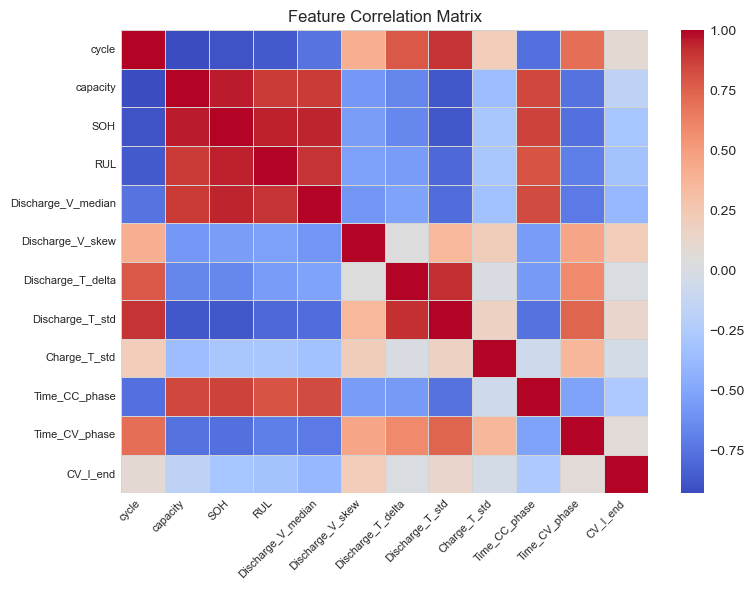

In [15]:
# Init object analyzer
analyzer = FeatureAnalyzer(combined_data=df_combined)

# Plot heatmap
analyzer.plot_correlation_heatmap(figsize=(8, 6), annot=False)


Top 5 Positive/Negative:
capacity              0.958613
RUL                   0.948663
Discharge_V_median    0.943803
Time_CC_phase         0.856973
Charge_T_std         -0.288075
Name: SOH, dtype: float64
Discharge_V_skew    -0.551892
Discharge_T_delta   -0.659147
Time_CV_phase       -0.763732
Discharge_T_std     -0.877038
cycle               -0.894295
Name: SOH, dtype: float64

Plotting correlation with target: 'SOH'...


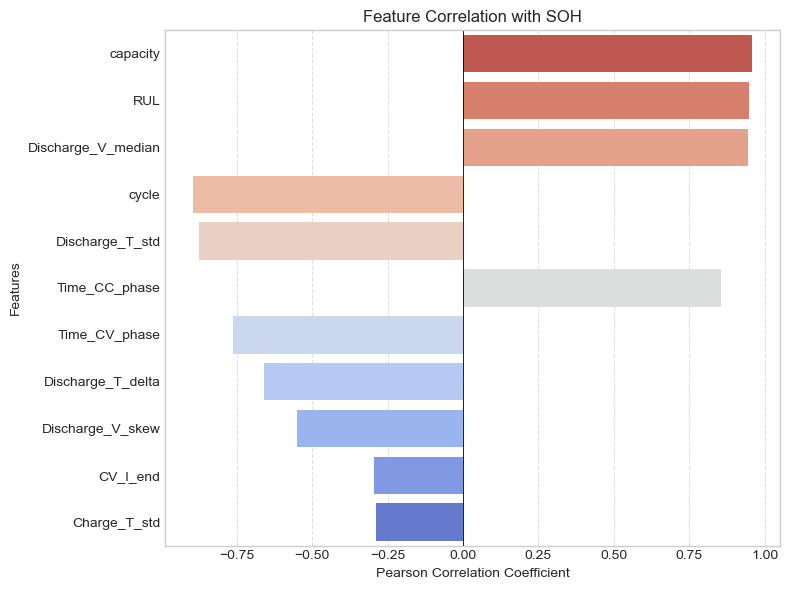

In [16]:
# Get correlation value with SOH and RUL
soh_correlation = analyzer.get_correlation_with_target('SOH')

print("Top 5 Positive/Negative:")
print(soh_correlation.drop('SOH', errors='ignore').head())
print(soh_correlation.drop('SOH', errors='ignore').tail())
analyzer.plot_correlation_with_target('SOH', sort_by_abs=True, figsize=(8,6))




# CHOOSE FEATURES FOR MODEL TRAINING


In [20]:
# Init object FeatureSelector
selector = FeatureSelector(
    combined_data=df_combined,
    target_cols=['SOH', 'RUL'],
    group_col='battery_id',
    other_cols_to_exclude=['cycle','capacity']
)

FeatureSelector initialized. Columns always excluded: ['battery_id', 'capacity', 'RUL', 'cycle', 'SOH']


In [82]:
from itertools import combinations

ff = ['Discharge_V_median','Discharge_T_delta','Discharge_T_std','Charge_T_std',
 'Time_CC_phase', 
 'Time_CV_phase']
all_subsets = []

# Lặp qua tất cả các độ dài có thể của tập con
# từ 0 (tập rỗng) đến len(ff) (chính danh sách ff)
for r in  [6, 5, 4, 3, 2, 1]:
    # Tạo các tổ hợp (combinations) có độ dài r
    # combinations trả về các tuple, nên chúng ta chuyển chúng thành list
    subsets_of_length_r = combinations(ff, r)
    for subset_tuple in subsets_of_length_r:
        all_subsets.append(list(subset_tuple))

# In ra tất cả các tập con
# for subset in all_subsets:
# print(subset)

print(f"Danh sách gốc: {ff}")
print(f"Số lượng phần tử trong danh sách gốc: {len(ff)}")
print(f"Tổng số tập con (bao gồm tập rỗng và chính nó): {len(all_subsets)}")
for x in all_subsets:
    print(x)
print(type(all_subsets))


Danh sách gốc: ['Discharge_V_median', 'Discharge_T_delta', 'Discharge_T_std', 'Charge_T_std', 'Time_CC_phase', 'Time_CV_phase']
Số lượng phần tử trong danh sách gốc: 6
Tổng số tập con (bao gồm tập rỗng và chính nó): 63
['Discharge_V_median', 'Discharge_T_delta', 'Discharge_T_std', 'Charge_T_std', 'Time_CC_phase', 'Time_CV_phase']
['Discharge_V_median', 'Discharge_T_delta', 'Discharge_T_std', 'Charge_T_std', 'Time_CC_phase']
['Discharge_V_median', 'Discharge_T_delta', 'Discharge_T_std', 'Charge_T_std', 'Time_CV_phase']
['Discharge_V_median', 'Discharge_T_delta', 'Discharge_T_std', 'Time_CC_phase', 'Time_CV_phase']
['Discharge_V_median', 'Discharge_T_delta', 'Charge_T_std', 'Time_CC_phase', 'Time_CV_phase']
['Discharge_V_median', 'Discharge_T_std', 'Charge_T_std', 'Time_CC_phase', 'Time_CV_phase']
['Discharge_T_delta', 'Discharge_T_std', 'Charge_T_std', 'Time_CC_phase', 'Time_CV_phase']
['Discharge_V_median', 'Discharge_T_delta', 'Discharge_T_std', 'Charge_T_std']
['Discharge_V_median', 

# Training model

In [17]:
# 1. Khởi tạo Evaluator và Trainer
# Nhóm 1: "Cây Phát triển Tự do" (Nguy cơ Overfitting Cao)
params_group0 = {'n_estimators': 500, 'random_state': 42, 'n_jobs': -1,
                 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 2
}

# --- 2. Định nghĩa 5 Nhóm Siêu tham số Random Forest ---
rf_base_params = {
    'random_state': 42,
    'n_jobs': -1,
    'bootstrap': True,
    'oob_score': False # oob_score không dùng với cross_val_score trực tiếp,
                      # nếu tự viết vòng lặp CV/LOBO thì có thể set True và lấy giá trị
}

# Nhóm 1: "Cấu hình Cơ bản - Baseline (Cây Tương đối Tự do)"
params_group1_rf = {
    **rf_base_params, 'n_estimators': 100, 'max_depth': None,
    'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt' # hoặc 1.0 cho hồi quy
}

# Nhóm 2: "Tăng Nhẹ Số lượng Cây và Bắt đầu Giới hạn Độ sâu"
params_group2_rf = {
    **rf_base_params, 'n_estimators': 200, 'max_depth': 15,
    'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2' # hoặc 0.7 cho hồi quy
}

# Nhóm 3: "Tập trung Kiểm soát Overfitting qua Cấu trúc Cây"
params_group3_rf = {
    **rf_base_params, 'n_estimators': 300, 'max_depth': 10,
    'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 0.5
}

# Nhóm 4: "Tăng cường Số lượng Cây và Tinh chỉnh max_features"
params_group4_rf = {
    **rf_base_params, 'n_estimators': 500, 'max_depth': 12, # Dựa trên kết quả nhóm 3
    'min_samples_split': 8, 'min_samples_leaf': 4,      # Dựa trên kết quả nhóm 3
    'max_features': 0.6 # Thử một giá trị khác
}


evaluator_cv_plot = ModelEvaluator(metrics_to_calculate=['mae', 'rmse', 'r2'])
trainer_cv_plot_4 = ModelTrainer(
    model_type='RandomForest',
    model_params=params_group4_rf
)
trainer_cv_plot_0 = ModelTrainer(
    model_type='RandomForest',
    model_params=params_group0
)
trainer_cv_plot_1 = ModelTrainer(
    model_type='RandomForest',
    model_params=params_group1_rf   
)
trainer_cv_plot_2 = ModelTrainer(
    model_type='RandomForest',
    model_params=params_group2_rf
)
trainer_cv_plot_3 = ModelTrainer(
    model_type='RandomForest',
    model_params=params_group3_rf
)
trainer_cv_rf_plots = [trainer_cv_plot_0, trainer_cv_plot_1, trainer_cv_plot_2, trainer_cv_plot_3, trainer_cv_plot_4]

ModelEvaluator initialized to calculate: ['rmse', 'r2', 'mae']
ModelTrainer initialized for model type: RandomForest with params: {'random_state': 42, 'n_jobs': -1, 'bootstrap': True, 'oob_score': False, 'n_estimators': 500, 'max_depth': 12, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_features': 0.6}
ModelTrainer initialized for model type: RandomForest with params: {'n_estimators': 500, 'random_state': 42, 'n_jobs': -1, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 2}
ModelTrainer initialized for model type: RandomForest with params: {'random_state': 42, 'n_jobs': -1, 'bootstrap': True, 'oob_score': False, 'n_estimators': 100, 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
ModelTrainer initialized for model type: RandomForest with params: {'random_state': 42, 'n_jobs': -1, 'bootstrap': True, 'oob_score': False, 'n_estimators': 200, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2'}
M

# Chose optimization features for Random Forest

In [ ]:
lst_rmse_1 = []
for desired_feature in all_subsets:
    desired_features = desired_feature
    print(desired_features)
    selector.select(
        method="manual",
        config={'feature_list':desired_features}
    )
    selected_corr = selector.get_selected_features()
    df_selected = selector.get_data_with_selected_features(include_targets=True, include_group=True)
    time_col_to_use = 'cycle'
    print("\nInitializing CrossValidator for SOH...")
    cv_soh_plot = CrossValidator(
        data=df_selected,
        feature_cols=selected_corr,
        target_col='SOH',
        group_col='battery_id',
        model_trainer=trainer_cv_plot_0,
        evaluator=evaluator_cv_plot,
        cv_strategy='LOBO',
        time_col=time_col_to_use # Truyền tên cột cycle (hoặc None)
    )
        
    # 3. Chạy Cross-Validation và YÊU CẦU VẼ ĐỒ THỊ TỪNG FOLD
    cv_soh_plot.run(plot_each_fold=False) # Đặt thành True

    # 4. Lấy và hiển thị kết quả metrics SOH (đã được in trong get_metrics_summary)
    soh_metrics_summary_plot = cv_soh_plot.get_metrics_summary()
    lst_rmse_1.append(soh_metrics_summary_plot['mean']['rmse'])



Feature: ['Discharge_V_median', 'Discharge_T_delta', 'Discharge_T_std', 'Charge_T_std', 'Time_CC_phase', 'Time_CV_phase'], RMSE: 3.1968361017648212
Feature: ['Discharge_V_median', 'Discharge_T_delta', 'Discharge_T_std', 'Charge_T_std', 'Time_CC_phase'], RMSE: 3.1763508740037
Feature: ['Discharge_V_median', 'Discharge_T_delta', 'Discharge_T_std', 'Charge_T_std', 'Time_CV_phase'], RMSE: 4.205054978447899
Feature: ['Discharge_V_median', 'Discharge_T_delta', 'Discharge_T_std', 'Time_CC_phase', 'Time_CV_phase'], RMSE: 3.2115559729059724
Feature: ['Discharge_V_median', 'Discharge_T_delta', 'Charge_T_std', 'Time_CC_phase', 'Time_CV_phase'], RMSE: 3.2226382453141236
Feature: ['Discharge_V_median', 'Discharge_T_std', 'Charge_T_std', 'Time_CC_phase', 'Time_CV_phase'], RMSE: 3.1845747451124335
Feature: ['Discharge_T_delta', 'Discharge_T_std', 'Charge_T_std', 'Time_CC_phase', 'Time_CV_phase'], RMSE: 4.094918363922984
Feature: ['Discharge_V_median', 'Discharge_T_delta', 'Discharge_T_std', 'Charge_T

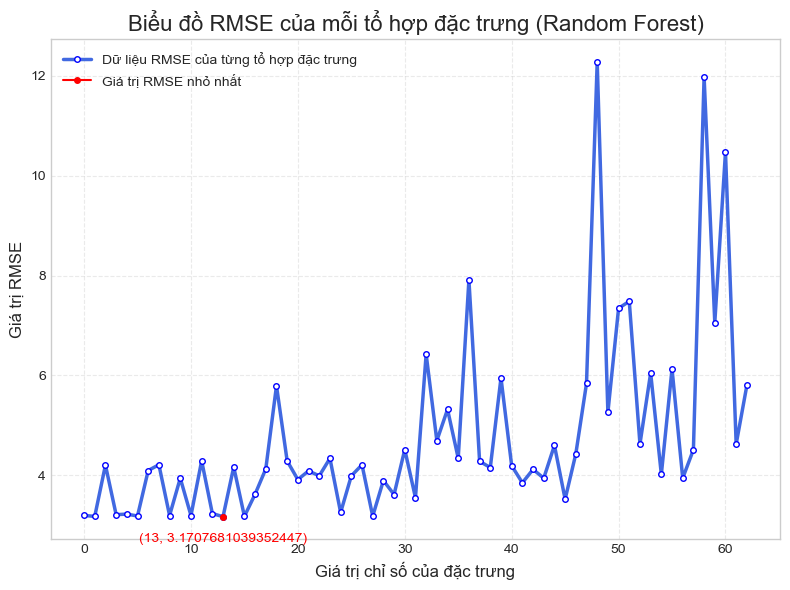

In [86]:
min_rmse_1 = min(lst_rmse_1)
y = []
x = []
min_x = 0
min_y = 0
for index, rmse_feature in enumerate(lst_rmse_1):
    x.append(index)
    y.append(rmse_feature)
    print(f'Feature: {all_subsets[index]}, RMSE: {rmse_feature}')
    if rmse_feature == min_rmse_1:
        print(f'Feature optimazation: {all_subsets[index]}, RMSE: {rmse_feature}')
        min_x = index
        min_y = rmse_feature
        continue

# Thiết lập kích thước ảnh (đơn vị: inch)
plt.figure(figsize=(8, 6))  # rộng 10 inch, cao 6 inch

# Vẽ đường
plt.plot(
    x, y,
    color='royalblue',         # Màu đường
    linewidth=2.5,             # Độ dày
    marker='o',                # Hình marker tại các điểm
    markersize=4,              # Kích thước marker
    markerfacecolor='white',   # Màu nền marker
    markeredgecolor='blue',    # Màu viền marker
    label='Dữ liệu RMSE của từng tổ hợp đặc trưng'
)

# Tiêu đề và nhãn trục
plt.title('Biểu đồ RMSE của mỗi tổ hợp đặc trưng (Random Forest)', fontsize=16)
plt.xlabel('Giá trị chỉ số của đặc trưng', fontsize=12)
plt.ylabel('Giá trị RMSE', fontsize=12)

# Vẽ điểm y nhỏ nhất với màu đỏ
plt.plot(
    min_x, min_y,
    marker='o',
    color='red',
    markersize=4,
    label='Giá trị RMSE nhỏ nhất'
)

# Ghi chú điểm nhỏ nhất
plt.text(min_x, min_y - 0.5, f'({min_x}, {min_y})', color='red', ha='center')
plt.grid(True, linestyle='--', alpha=0.4)

# Hiển thị chú thích
plt.legend()

# Tối ưu bố cục
plt.tight_layout()

# Hiển thị đồ thị
plt.show()

In [18]:
# --- 2. Định nghĩa 5 Nhóm Siêu tham số XGBoost ---
xgb_base_params = {
    'objective': 'reg:squarederror',
    'random_state': 42,
    'n_jobs': -1,
    'eval_metric': 'rmse' # Theo dõi RMSE
}

# Nhóm 1: "Cấu hình Cơ bản - Baseline"
params_group1_xgb = {
    **xgb_base_params, 'n_estimators': 50, 'learning_rate': 0.1, 'max_depth': 3,
    'subsample': 0.8, 'colsample_bytree': 0.8, 'min_child_weight': 1,
    'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1
}

# Nhóm 2: "Tăng Nhẹ Độ Phức tạp và Số lượng Cây"
params_group2_xgb = {
    **xgb_base_params, 'n_estimators': 150, 'learning_rate': 0.05, 'max_depth': 5,
    'subsample': 0.8, 'colsample_bytree': 0.8, 'min_child_weight': 1,
    'gamma': 0.05, 'reg_alpha': 0, 'reg_lambda': 1
}

# Nhóm 3: "Tối ưu hóa Độ sâu và Learning Rate - Hướng tới Độ chính xác Cao hơn"
params_group3_xgb = {
    **xgb_base_params, 'n_estimators': 300, 'learning_rate': 0.02, 'max_depth': 7, # Tăng max_depth
    'subsample': 0.75, 'colsample_bytree': 0.75, 'min_child_weight': 3,
    'gamma': 0.1, 'reg_alpha': 0.01, 'reg_lambda': 0.5
}

# Nhóm 4: "Tăng cường Điều chuẩn (Regularization) và Tinh chỉnh Sâu"
params_group4_xgb = {
    **xgb_base_params, 'n_estimators': 800, 'learning_rate': 0.01, 'max_depth': 5, # Giảm lại max_depth
    'subsample': 0.7, 'colsample_bytree': 0.7, 'min_child_weight': 5,
    'gamma': 0.2, 'reg_alpha': 0.05, 'reg_lambda': 1.5
}

# Nhóm 5: "Thăm dò Nâng cao với Early Stopping" (Sẽ cần xử lý đặc biệt trong vòng lặp)
# Chúng ta sẽ định nghĩa các khoảng giá trị để thử nghiệm cho nhóm này sau,
# hoặc bạn có thể cố định một vài cấu hình từ các khoảng đó.
# Để đơn giản trong vòng lặp này, chúng ta sẽ tạo một cấu hình ví dụ cho Nhóm 5.
params_group5_xgb_example = {
    **xgb_base_params, 'n_estimators': 1500, 'learning_rate': 0.01, 'max_depth': 6,
    'subsample': 0.7, 'colsample_bytree': 0.7, 'min_child_weight': 3,
    'gamma': 0.1, 'reg_alpha': 0.01, 'reg_lambda': 1,
}

evaluator_cv_plot = ModelEvaluator(metrics_to_calculate=['mae', 'rmse', 'r2'])
trainer_cv_xg_4 = ModelTrainer(
    model_type='XGBoost',
    model_params=params_group4_xgb
)
trainer_cv_xg_0 = ModelTrainer(
    model_type='XGBoost',
    model_params=xgb_base_params
)
trainer_cv_xg_1 = ModelTrainer(
    model_type='XGBoost',
    model_params=params_group1_xgb
)
trainer_cv_xg_2 = ModelTrainer(
    model_type='XGBoost',
    model_params=params_group2_xgb
)
trainer_cv_xg_3 = ModelTrainer(
    model_type='XGBoost',
    model_params=params_group3_xgb
)
trainer_cv_xgb_plots = [trainer_cv_xg_0, trainer_cv_xg_1, trainer_cv_xg_2, trainer_cv_xg_3, trainer_cv_xg_4]

ModelEvaluator initialized to calculate: ['rmse', 'r2', 'mae']
ModelTrainer initialized for model type: XGBoost with params: {'objective': 'reg:squarederror', 'random_state': 42, 'n_jobs': -1, 'eval_metric': 'rmse', 'n_estimators': 800, 'learning_rate': 0.01, 'max_depth': 5, 'subsample': 0.7, 'colsample_bytree': 0.7, 'min_child_weight': 5, 'gamma': 0.2, 'reg_alpha': 0.05, 'reg_lambda': 1.5}
ModelTrainer initialized for model type: XGBoost with params: {'objective': 'reg:squarederror', 'random_state': 42, 'n_jobs': -1, 'eval_metric': 'rmse'}
ModelTrainer initialized for model type: XGBoost with params: {'objective': 'reg:squarederror', 'random_state': 42, 'n_jobs': -1, 'eval_metric': 'rmse', 'n_estimators': 50, 'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.8, 'colsample_bytree': 0.8, 'min_child_weight': 1, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}
ModelTrainer initialized for model type: XGBoost with params: {'objective': 'reg:squarederror', 'random_state': 42, 'n_jobs': -1, '

# Chose optimization features for XGBoost

In [ ]:
lst_rmse_2 = []
for desired_feature in all_subsets:
    desired_features = desired_feature
    print(desired_features)
    selector.select(
        method="manual",
        config={'feature_list':desired_features}
    )
    selected_corr = selector.get_selected_features()
    df_selected = selector.get_data_with_selected_features(include_targets=True, include_group=True)
    time_col_to_use = 'cycle'
    print("\nInitializing CrossValidator for SOH...")
    cv_soh_plot = CrossValidator(
        data=df_selected,
        feature_cols=selected_corr,
        target_col='SOH',
        group_col='battery_id',
        model_trainer=trainer_cv_xg_0,
        evaluator=evaluator_cv_plot,
        cv_strategy='LOBO',
        time_col=time_col_to_use # Truyền tên cột cycle (hoặc None)
    )
        
    # 3. Chạy Cross-Validation và YÊU CẦU VẼ ĐỒ THỊ TỪNG FOLD
    cv_soh_plot.run(plot_each_fold=False) # Đặt thành True

    # 4. Lấy và hiển thị kết quả metrics SOH (đã được in trong get_metrics_summary)
    soh_metrics_summary_plot = cv_soh_plot.get_metrics_summary()
    lst_rmse_2.append(soh_metrics_summary_plot['mean']['rmse'])

Feature: ['Discharge_V_median', 'Discharge_T_delta', 'Discharge_T_std', 'Charge_T_std', 'Time_CC_phase', 'Time_CV_phase'], RMSE: 3.2452189106262965
Feature: ['Discharge_V_median', 'Discharge_T_delta', 'Discharge_T_std', 'Charge_T_std', 'Time_CC_phase'], RMSE: 3.2997290058619266
Feature: ['Discharge_V_median', 'Discharge_T_delta', 'Discharge_T_std', 'Charge_T_std', 'Time_CV_phase'], RMSE: 4.186099992141678
Feature: ['Discharge_V_median', 'Discharge_T_delta', 'Discharge_T_std', 'Time_CC_phase', 'Time_CV_phase'], RMSE: 3.3618825666459045
Feature: ['Discharge_V_median', 'Discharge_T_delta', 'Charge_T_std', 'Time_CC_phase', 'Time_CV_phase'], RMSE: 3.2990291176203588
Feature: ['Discharge_V_median', 'Discharge_T_std', 'Charge_T_std', 'Time_CC_phase', 'Time_CV_phase'], RMSE: 3.3409487387657846
Feature: ['Discharge_T_delta', 'Discharge_T_std', 'Charge_T_std', 'Time_CC_phase', 'Time_CV_phase'], RMSE: 4.055514898322723
Feature: ['Discharge_V_median', 'Discharge_T_delta', 'Discharge_T_std', 'Charg

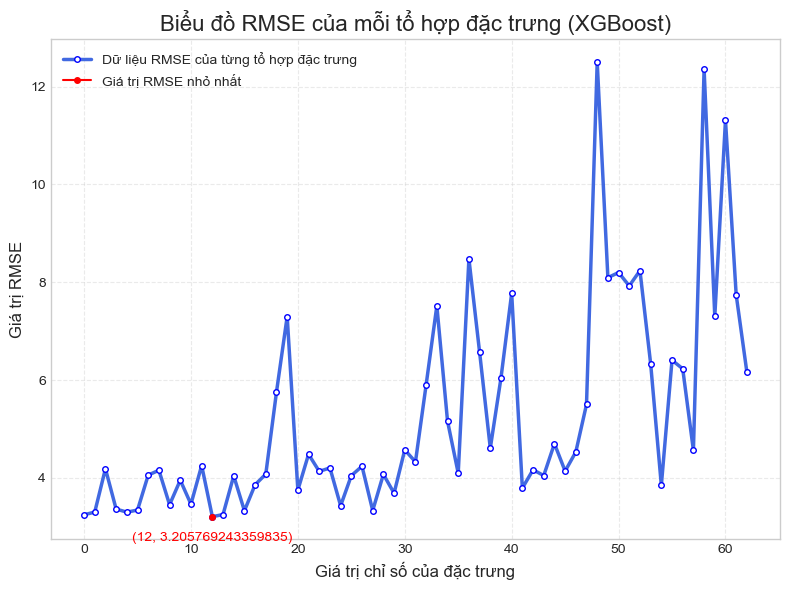

In [89]:
min_rmse = min(lst_rmse_2)
y = []
x = []
min_x = 0
min_y = 0
for index, rmse_feature in enumerate(lst_rmse_2):
    x.append(index)
    y.append(rmse_feature)
    print(f'Feature: {all_subsets[index]}, RMSE: {rmse_feature}')
    if rmse_feature == min_rmse:
        print(f'Feature optimazation: {all_subsets[index]}, RMSE: {rmse_feature}')
        min_x = index
        min_y = rmse_feature
        continue

# Thiết lập kích thước ảnh (đơn vị: inch)
plt.figure(figsize=(8, 6))  # rộng 10 inch, cao 6 inch

# Vẽ đường
plt.plot(
    x, y,
    color='royalblue',         # Màu đường
    linewidth=2.5,             # Độ dày
    marker='o',                # Hình marker tại các điểm
    markersize=4,              # Kích thước marker
    markerfacecolor='white',   # Màu nền marker
    markeredgecolor='blue',    # Màu viền marker
    label='Dữ liệu RMSE của từng tổ hợp đặc trưng'
)

# Tiêu đề và nhãn trục
plt.title('Biểu đồ RMSE của mỗi tổ hợp đặc trưng (XGBoost)', fontsize=16)
plt.xlabel('Giá trị chỉ số của đặc trưng', fontsize=12)
plt.ylabel('Giá trị RMSE', fontsize=12)

# Vẽ điểm y nhỏ nhất với màu đỏ
plt.plot(
    min_x, min_y,
    marker='o',
    color='red',
    markersize=4,
    label='Giá trị RMSE nhỏ nhất'
)

# Ghi chú điểm nhỏ nhất
plt.text(min_x, min_y - 0.5, f'({min_x}, {min_y})', color='red', ha='center')
plt.grid(True, linestyle='--', alpha=0.4)

# Hiển thị chú thích
plt.legend()

# Tối ưu bố cục
plt.tight_layout()

# Hiển thị đồ thị
plt.show()

Feature: ['Discharge_V_median', 'Discharge_T_delta', 'Discharge_T_std', 'Charge_T_std', 'Time_CC_phase', 'Time_CV_phase'], RMSE: 3.2210275061955587
Feature: ['Discharge_V_median', 'Discharge_T_delta', 'Discharge_T_std', 'Charge_T_std', 'Time_CC_phase'], RMSE: 3.238039939932813
Feature: ['Discharge_V_median', 'Discharge_T_delta', 'Discharge_T_std', 'Charge_T_std', 'Time_CV_phase'], RMSE: 4.1955774852947885
Feature: ['Discharge_V_median', 'Discharge_T_delta', 'Discharge_T_std', 'Time_CC_phase', 'Time_CV_phase'], RMSE: 3.286719269775938
Feature: ['Discharge_V_median', 'Discharge_T_delta', 'Charge_T_std', 'Time_CC_phase', 'Time_CV_phase'], RMSE: 3.260833681467241
Feature: ['Discharge_V_median', 'Discharge_T_std', 'Charge_T_std', 'Time_CC_phase', 'Time_CV_phase'], RMSE: 3.262761741939109
Feature: ['Discharge_T_delta', 'Discharge_T_std', 'Charge_T_std', 'Time_CC_phase', 'Time_CV_phase'], RMSE: 4.075216631122854
Feature: ['Discharge_V_median', 'Discharge_T_delta', 'Discharge_T_std', 'Charge_T

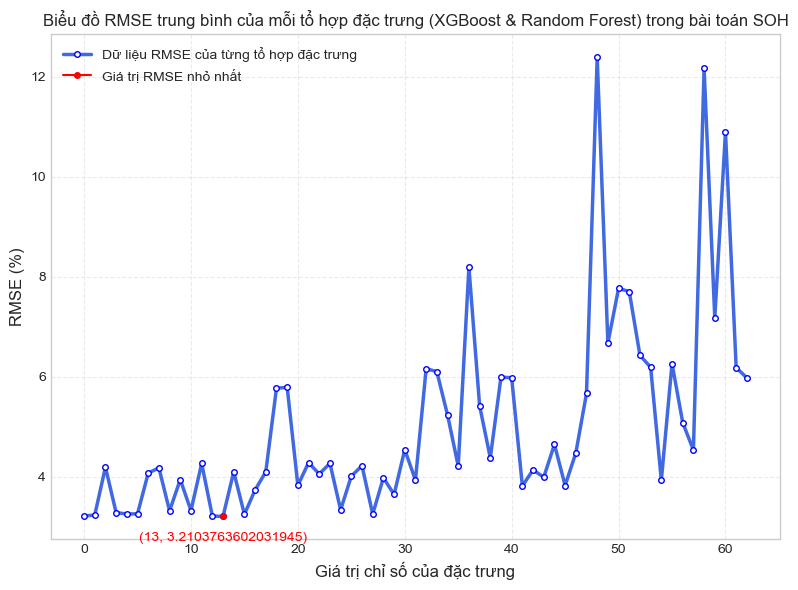

In [91]:
mean_rmse = [(a + b) / 2 for a, b in zip(lst_rmse_1, lst_rmse_2)]
min_rmse = min(mean_rmse)
y = []
x = []
min_x = 0
min_y = 0
for index, rmse_feature in enumerate(mean_rmse):
    x.append(index)
    y.append(rmse_feature)
    print(f'Feature: {all_subsets[index]}, RMSE: {rmse_feature}')
    if rmse_feature == min_rmse:
        print(f'Feature optimazation: {all_subsets[index]}, RMSE: {rmse_feature}')
        min_x = index
        min_y = rmse_feature
        continue

# Thiết lập kích thước ảnh (đơn vị: inch)
plt.figure(figsize=(8, 6))  # rộng 10 inch, cao 6 inch

# Vẽ đường
plt.plot(
    x, y,
    color='royalblue',         # Màu đường
    linewidth=2.5,             # Độ dày
    marker='o',                # Hình marker tại các điểm
    markersize=4,              # Kích thước marker
    markerfacecolor='white',   # Màu nền marker
    markeredgecolor='blue',    # Màu viền marker
    label='Dữ liệu RMSE của từng tổ hợp đặc trưng'
)

# Tiêu đề và nhãn trục
plt.title('Biểu đồ RMSE trung bình của mỗi tổ hợp đặc trưng (XGBoost & Random Forest) trong bài toán SOH', fontsize=12)
plt.xlabel('Giá trị chỉ số của đặc trưng', fontsize=12)
plt.ylabel('RMSE (%)', fontsize=12)

# Vẽ điểm y nhỏ nhất với màu đỏ
plt.plot(
    min_x, min_y,
    marker='o',
    color='red',
    markersize=4,
    label='Giá trị RMSE nhỏ nhất'
)

# Ghi chú điểm nhỏ nhất
plt.text(min_x, min_y - 0.5, f'({min_x}, {min_y})', color='red', ha='center')
plt.grid(True, linestyle='--', alpha=0.4)

# Hiển thị chú thích
plt.legend()

# Tối ưu bố cục
plt.tight_layout()

# Hiển thị đồ thị
plt.show()

# FINE-PARAMETER FOR RANDOM FORREST

['Discharge_V_median', 'Discharge_T_std', 'Charge_T_std', 'Time_CC_phase']

--- Selecting features using method: manual ---
  Applying manual selection with list: ['Discharge_V_median', 'Discharge_T_std', 'Charge_T_std', 'Time_CC_phase']
--- Feature selection finished. Selected 4 features ---
Selected Features: ['Discharge_V_median', 'Discharge_T_std', 'Charge_T_std', 'Time_CC_phase']

Initializing CrossValidator for SOH...
CrossValidator initialized for target 'SOH' using LOBO (4 splits).
Model to evaluate: RandomForest

--- Running LOBO CV for target 'SOH' (Plot each fold: True) ---


LOBO Folds:   0%|          | 0/4 [00:00<?, ?it/s]


Training RandomForest model...


LOBO Folds:  25%|██▌       | 1/4 [00:00<00:01,  2.00it/s]

RandomForest model training complete.
Predicting with trained RandomForest model...

Training RandomForest model...


LOBO Folds:  50%|█████     | 2/4 [00:00<00:00,  2.05it/s]

RandomForest model training complete.
Predicting with trained RandomForest model...

Training RandomForest model...


LOBO Folds:  75%|███████▌  | 3/4 [00:01<00:00,  2.12it/s]

RandomForest model training complete.
Predicting with trained RandomForest model...

Training RandomForest model...


LOBO Folds: 100%|██████████| 4/4 [00:01<00:00,  2.10it/s]

RandomForest model training complete.
Predicting with trained RandomForest model...
LOBO Cross-validation loop finished.


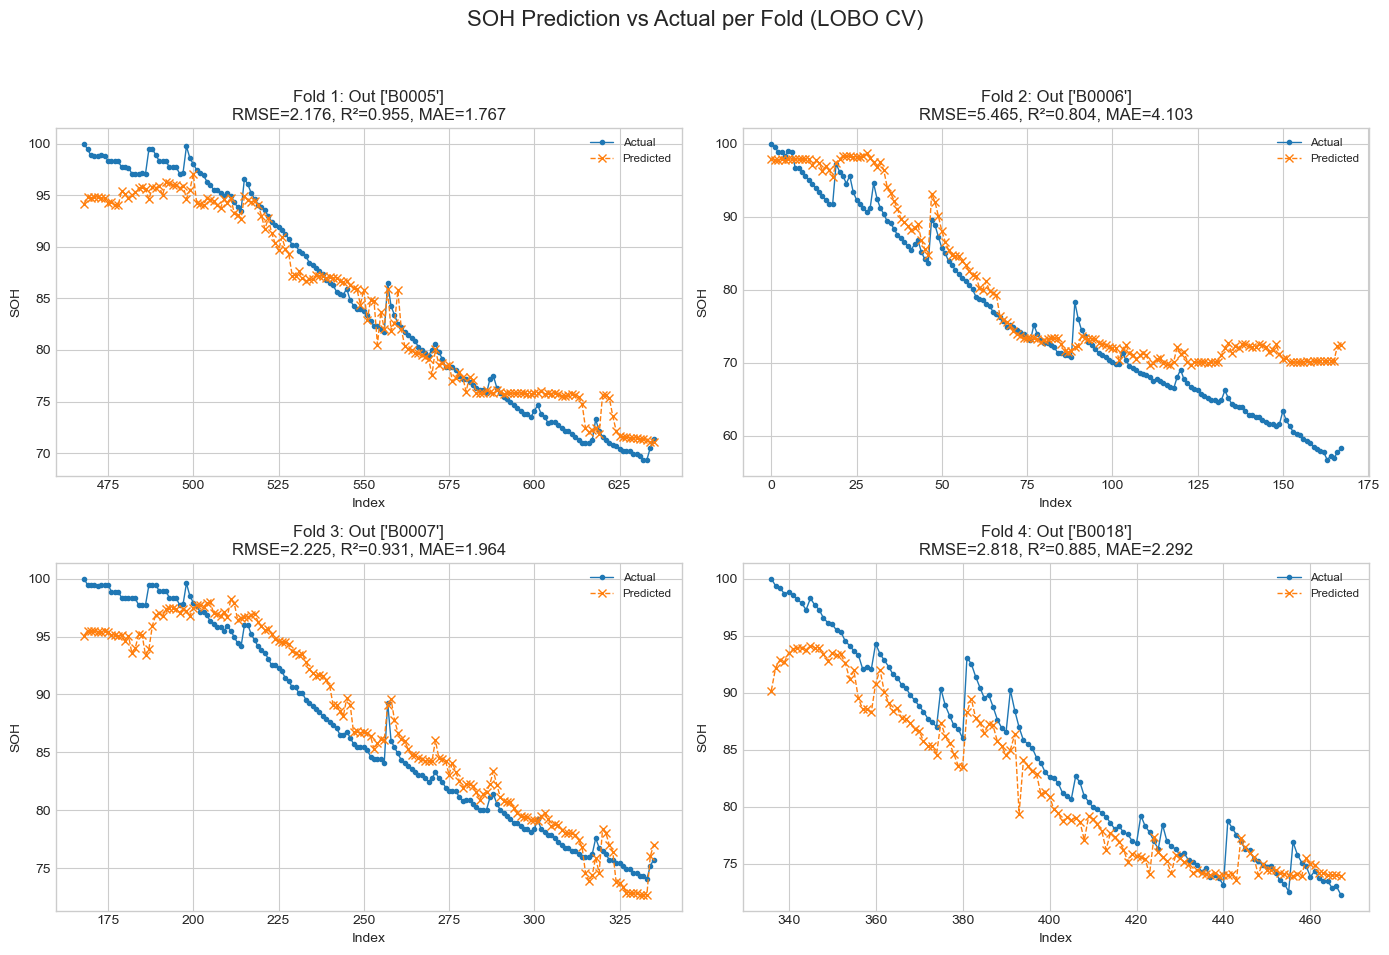


--- Cross-Validation Metrics Summary ---
  Mean R2: 0.8938 +/- 0.0575 
  Mean RMSE: 3.1708 +/- 1.3485 (%)
  Mean MAE: 2.5316 +/- 0.9264 (%)

Initializing CrossValidator for SOH...
CrossValidator initialized for target 'SOH' using LOBO (4 splits).
Model to evaluate: RandomForest

--- Running LOBO CV for target 'SOH' (Plot each fold: True) ---


LOBO Folds:  25%|██▌       | 1/4 [00:00<00:00,  7.49it/s]


Training RandomForest model...
RandomForest model training complete.
Predicting with trained RandomForest model...

Training RandomForest model...


LOBO Folds:  75%|███████▌  | 3/4 [00:00<00:00,  8.69it/s]

RandomForest model training complete.
Predicting with trained RandomForest model...

Training RandomForest model...
RandomForest model training complete.
Predicting with trained RandomForest model...

Training RandomForest model...


LOBO Folds: 100%|██████████| 4/4 [00:00<00:00,  8.47it/s]


RandomForest model training complete.
Predicting with trained RandomForest model...
LOBO Cross-validation loop finished.


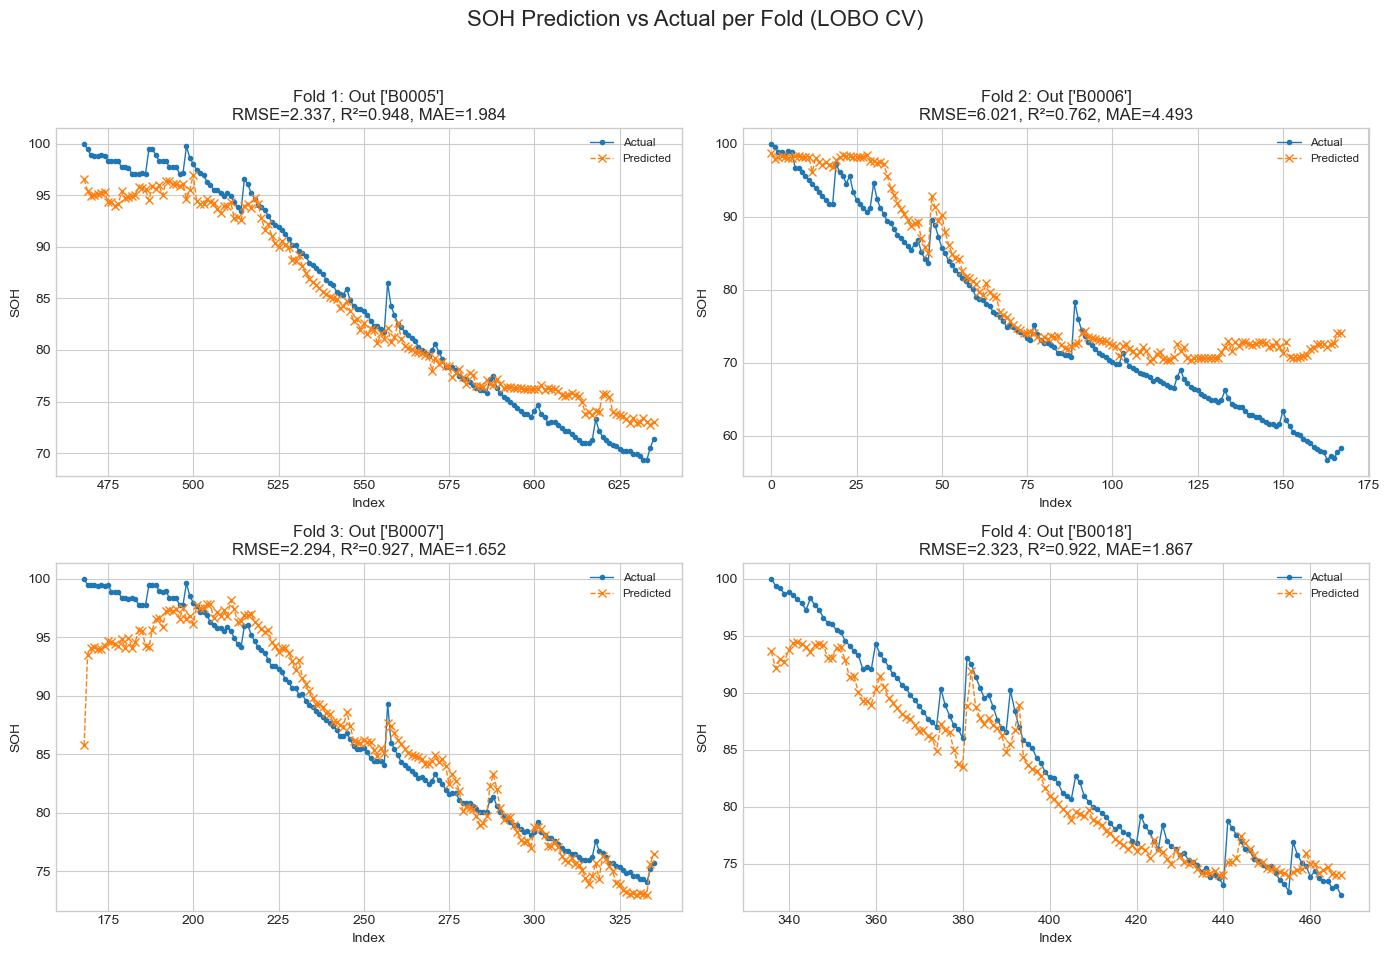


--- Cross-Validation Metrics Summary ---
  Mean R2: 0.8897 +/- 0.0743 
  Mean RMSE: 3.2439 +/- 1.6036 (%)
  Mean MAE: 2.4991 +/- 1.1573 (%)

Initializing CrossValidator for SOH...
CrossValidator initialized for target 'SOH' using LOBO (4 splits).
Model to evaluate: RandomForest

--- Running LOBO CV for target 'SOH' (Plot each fold: True) ---


LOBO Folds:   0%|          | 0/4 [00:00<?, ?it/s]


Training RandomForest model...
RandomForest model training complete.
Predicting with trained RandomForest model...


LOBO Folds:  25%|██▌       | 1/4 [00:00<00:00,  5.07it/s]


Training RandomForest model...


LOBO Folds:  50%|█████     | 2/4 [00:00<00:00,  5.13it/s]

RandomForest model training complete.
Predicting with trained RandomForest model...

Training RandomForest model...


LOBO Folds:  75%|███████▌  | 3/4 [00:00<00:00,  4.09it/s]

RandomForest model training complete.
Predicting with trained RandomForest model...

Training RandomForest model...
RandomForest model training complete.
Predicting with trained RandomForest model...


LOBO Folds: 100%|██████████| 4/4 [00:00<00:00,  4.46it/s]


LOBO Cross-validation loop finished.


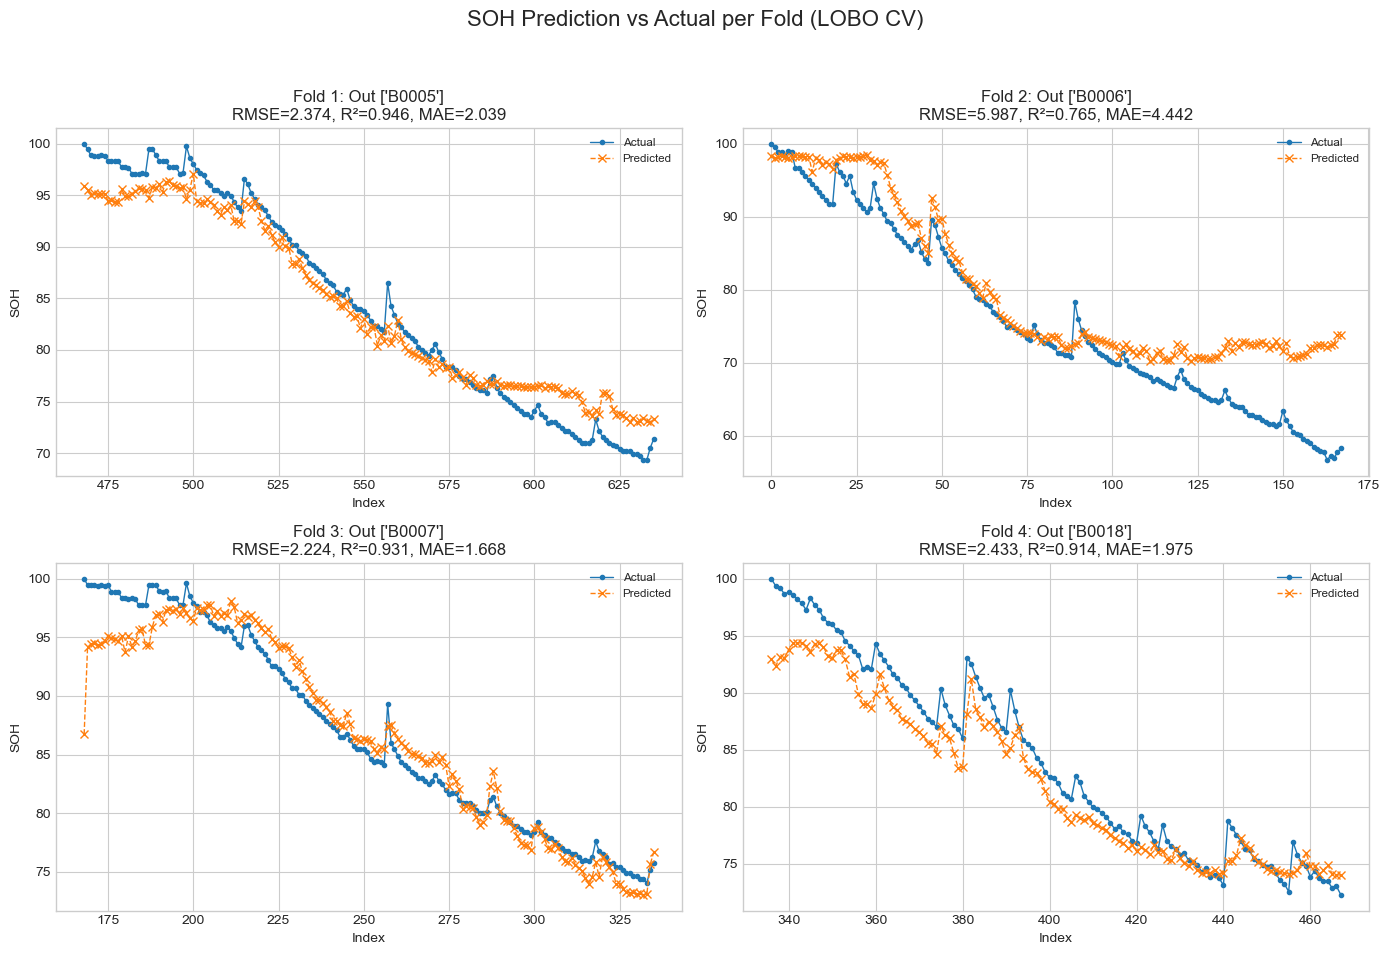


--- Cross-Validation Metrics Summary ---
  Mean R2: 0.8892 +/- 0.0727 
  Mean RMSE: 3.2544 +/- 1.5797 (%)
  Mean MAE: 2.5311 +/- 1.1121 (%)

Initializing CrossValidator for SOH...
CrossValidator initialized for target 'SOH' using LOBO (4 splits).
Model to evaluate: RandomForest

--- Running LOBO CV for target 'SOH' (Plot each fold: True) ---


LOBO Folds:   0%|          | 0/4 [00:00<?, ?it/s]


Training RandomForest model...


LOBO Folds:  25%|██▌       | 1/4 [00:00<00:00,  3.52it/s]

RandomForest model training complete.
Predicting with trained RandomForest model...

Training RandomForest model...


LOBO Folds:  50%|█████     | 2/4 [00:00<00:00,  3.61it/s]

RandomForest model training complete.
Predicting with trained RandomForest model...

Training RandomForest model...


LOBO Folds:  75%|███████▌  | 3/4 [00:00<00:00,  3.50it/s]

RandomForest model training complete.
Predicting with trained RandomForest model...

Training RandomForest model...


LOBO Folds: 100%|██████████| 4/4 [00:01<00:00,  3.57it/s]

RandomForest model training complete.
Predicting with trained RandomForest model...
LOBO Cross-validation loop finished.


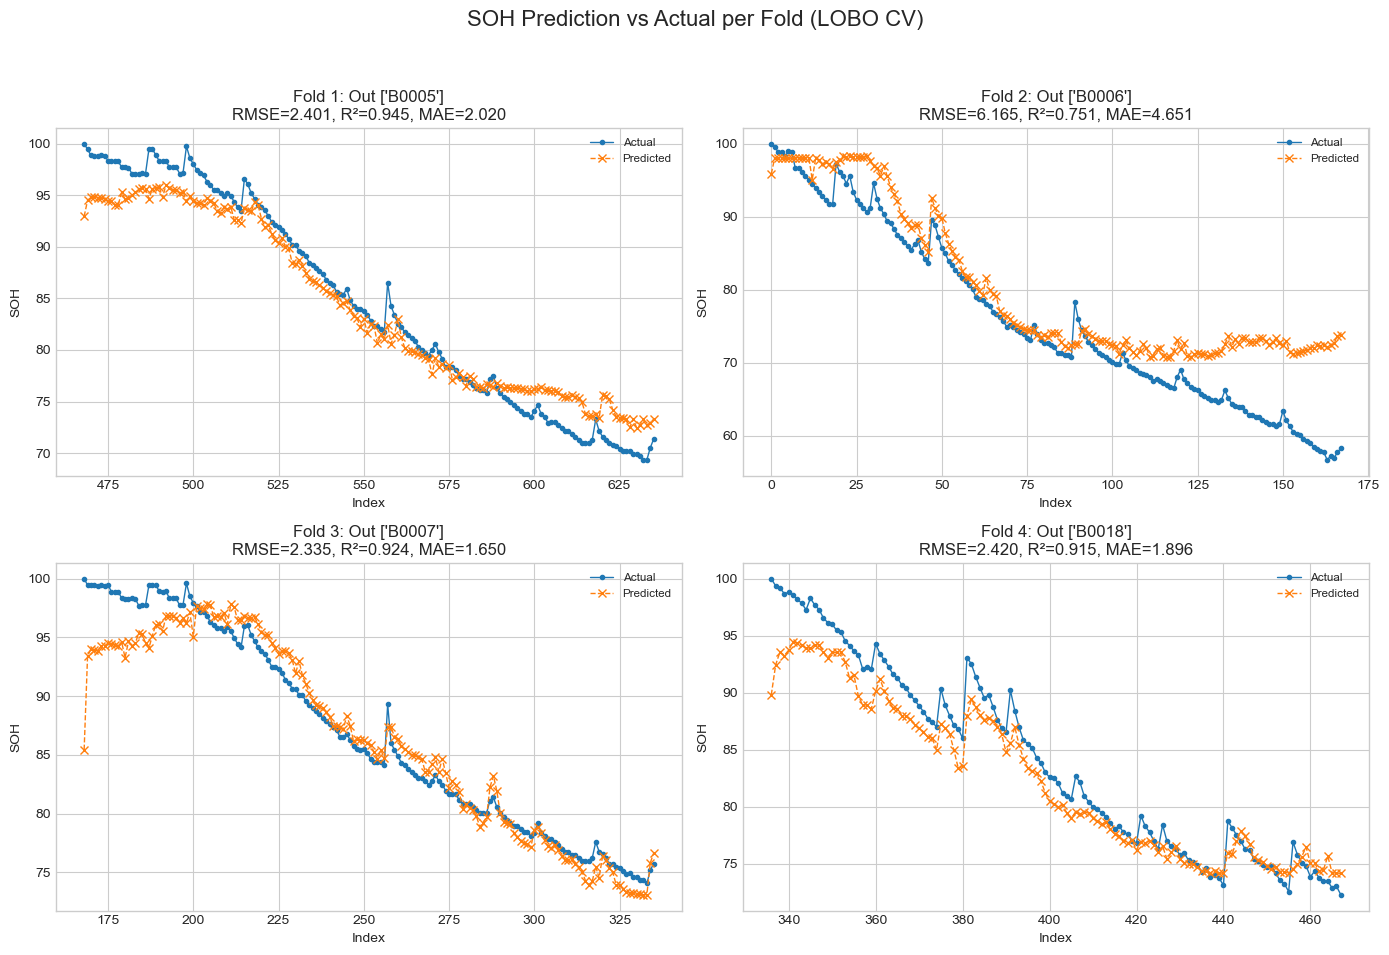


--- Cross-Validation Metrics Summary ---
  Mean R2: 0.8838 +/- 0.0776 
  Mean RMSE: 3.3300 +/- 1.6368 (%)
  Mean MAE: 2.5540 +/- 1.2178 (%)

Initializing CrossValidator for SOH...
CrossValidator initialized for target 'SOH' using LOBO (4 splits).
Model to evaluate: RandomForest

--- Running LOBO CV for target 'SOH' (Plot each fold: True) ---


LOBO Folds:   0%|          | 0/4 [00:00<?, ?it/s]


Training RandomForest model...


LOBO Folds:  25%|██▌       | 1/4 [00:00<00:01,  2.14it/s]

RandomForest model training complete.
Predicting with trained RandomForest model...

Training RandomForest model...


LOBO Folds:  50%|█████     | 2/4 [00:00<00:00,  2.18it/s]

RandomForest model training complete.
Predicting with trained RandomForest model...

Training RandomForest model...


LOBO Folds:  75%|███████▌  | 3/4 [00:01<00:00,  2.20it/s]

RandomForest model training complete.
Predicting with trained RandomForest model...

Training RandomForest model...


LOBO Folds: 100%|██████████| 4/4 [00:01<00:00,  2.20it/s]

RandomForest model training complete.
Predicting with trained RandomForest model...
LOBO Cross-validation loop finished.


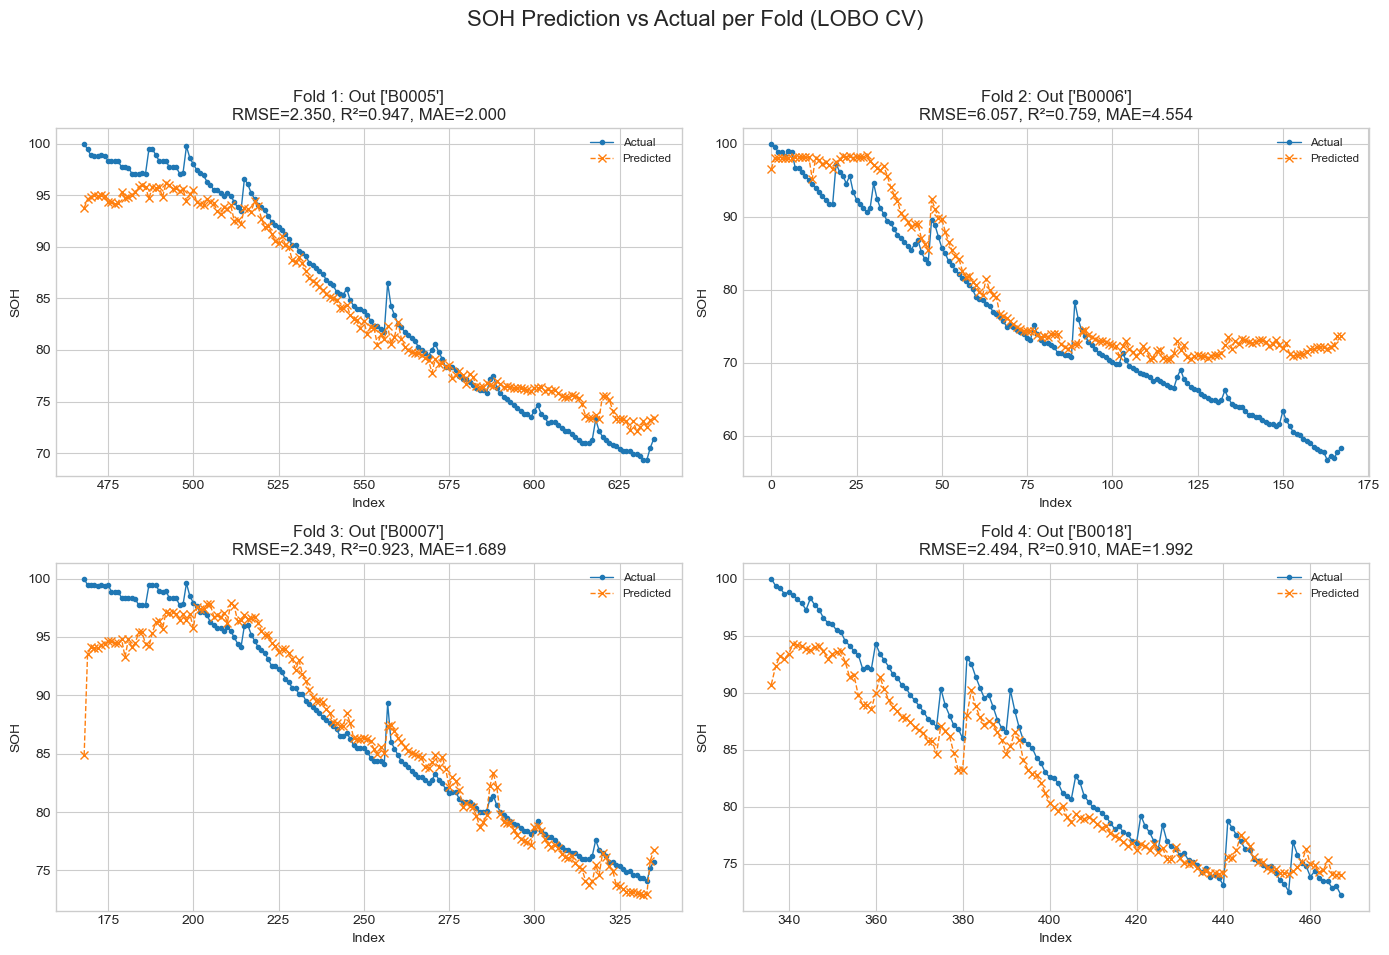


--- Cross-Validation Metrics Summary ---
  Mean R2: 0.8850 +/- 0.0738 
  Mean RMSE: 3.3124 +/- 1.5856 (%)
  Mean MAE: 2.5588 +/- 1.1587 (%)


In [54]:

desired_features = ['Discharge_V_median', 'Discharge_T_std', 'Charge_T_std', 'Time_CC_phase']
print(desired_features)
selector.select(
    method="manual",
    config={'feature_list':desired_features}
)
selected_corr = selector.get_selected_features()
df_selected = selector.get_data_with_selected_features(include_targets=True, include_group=True)
#  Khởi tạo CrossValidator cho SOH
for trainer_cv_plot in trainer_cv_rf_plots:
    time_col_to_use = 'cycle'
    print("\nInitializing CrossValidator for SOH...")
    cv_soh_plot = CrossValidator(
        data=df_selected,
        feature_cols=selected_corr,
        target_col='SOH',
        group_col='battery_id',
        model_trainer=trainer_cv_plot,
        evaluator=evaluator_cv_plot,
        cv_strategy='LOBO',
        time_col=time_col_to_use # Truyền tên cột cycle (hoặc None)
    )

    # 3. Chạy Cross-Validation và YÊU CẦU VẼ ĐỒ THỊ TỪNG FOLD
    cv_soh_plot.run(plot_each_fold=True) # Đặt thành True

    # 4. Lấy và hiển thị kết quả metrics SOH (đã được in trong get_metrics_summary)
    soh_metrics_summary_plot = cv_soh_plot.get_metrics_summary()
    



# FINE-PARAMETER FOR XGBOOST

['Discharge_V_median', 'Discharge_T_std', 'Charge_T_std', 'Time_CC_phase']

--- Selecting features using method: manual ---
  Applying manual selection with list: ['Discharge_V_median', 'Discharge_T_std', 'Charge_T_std', 'Time_CC_phase']
--- Feature selection finished. Selected 4 features ---
Selected Features: ['Discharge_V_median', 'Discharge_T_std', 'Charge_T_std', 'Time_CC_phase']

Initializing CrossValidator for SOH...
CrossValidator initialized for target 'SOH' using LOBO (4 splits).
Model to evaluate: XGBoost

--- Running LOBO CV for target 'SOH' (Plot each fold: True) ---


LOBO Folds:  50%|█████     | 2/4 [00:00<00:00, 16.23it/s]


Training XGBoost model...
XGBoost model training complete.
Predicting with trained XGBoost model...

Training XGBoost model...
XGBoost model training complete.
Predicting with trained XGBoost model...

Training XGBoost model...
XGBoost model training complete.
Predicting with trained XGBoost model...

Training XGBoost model...


LOBO Folds: 100%|██████████| 4/4 [00:00<00:00, 15.00it/s]


XGBoost model training complete.
Predicting with trained XGBoost model...
LOBO Cross-validation loop finished.


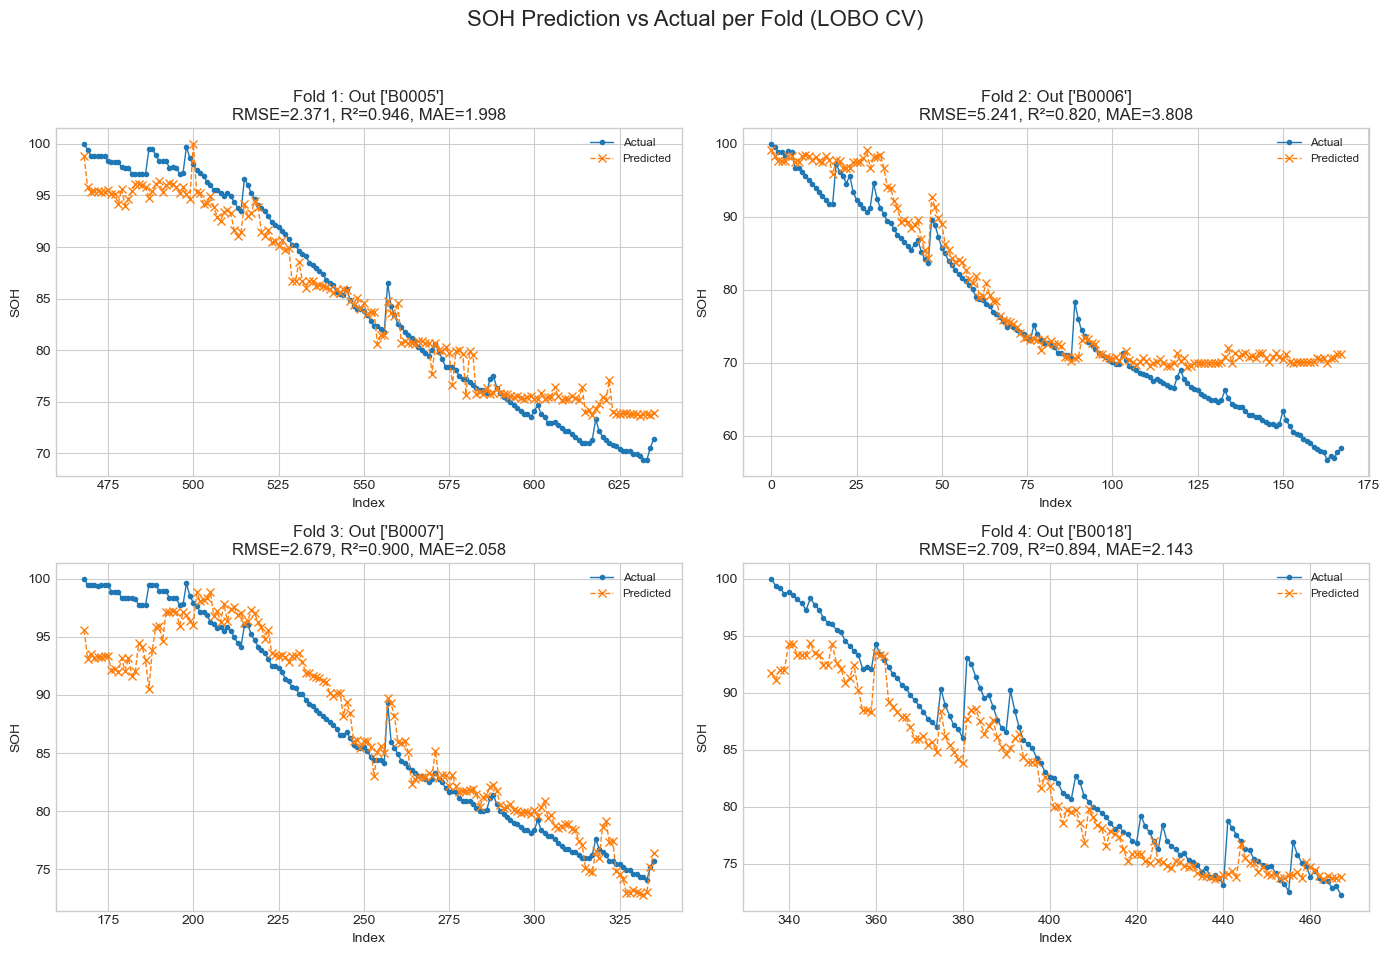


--- Cross-Validation Metrics Summary ---
  Mean R2: 0.8901 +/- 0.0453 
  Mean RMSE: 3.2500 +/- 1.1570 (%)
  Mean MAE: 2.5018 +/- 0.7557 (%)

Initializing CrossValidator for SOH...
CrossValidator initialized for target 'SOH' using LOBO (4 splits).
Model to evaluate: XGBoost

--- Running LOBO CV for target 'SOH' (Plot each fold: True) ---


LOBO Folds: 100%|██████████| 4/4 [00:00<00:00, 37.67it/s]


Training XGBoost model...
XGBoost model training complete.
Predicting with trained XGBoost model...

Training XGBoost model...
XGBoost model training complete.
Predicting with trained XGBoost model...

Training XGBoost model...
XGBoost model training complete.
Predicting with trained XGBoost model...

Training XGBoost model...
XGBoost model training complete.
Predicting with trained XGBoost model...
LOBO Cross-validation loop finished.


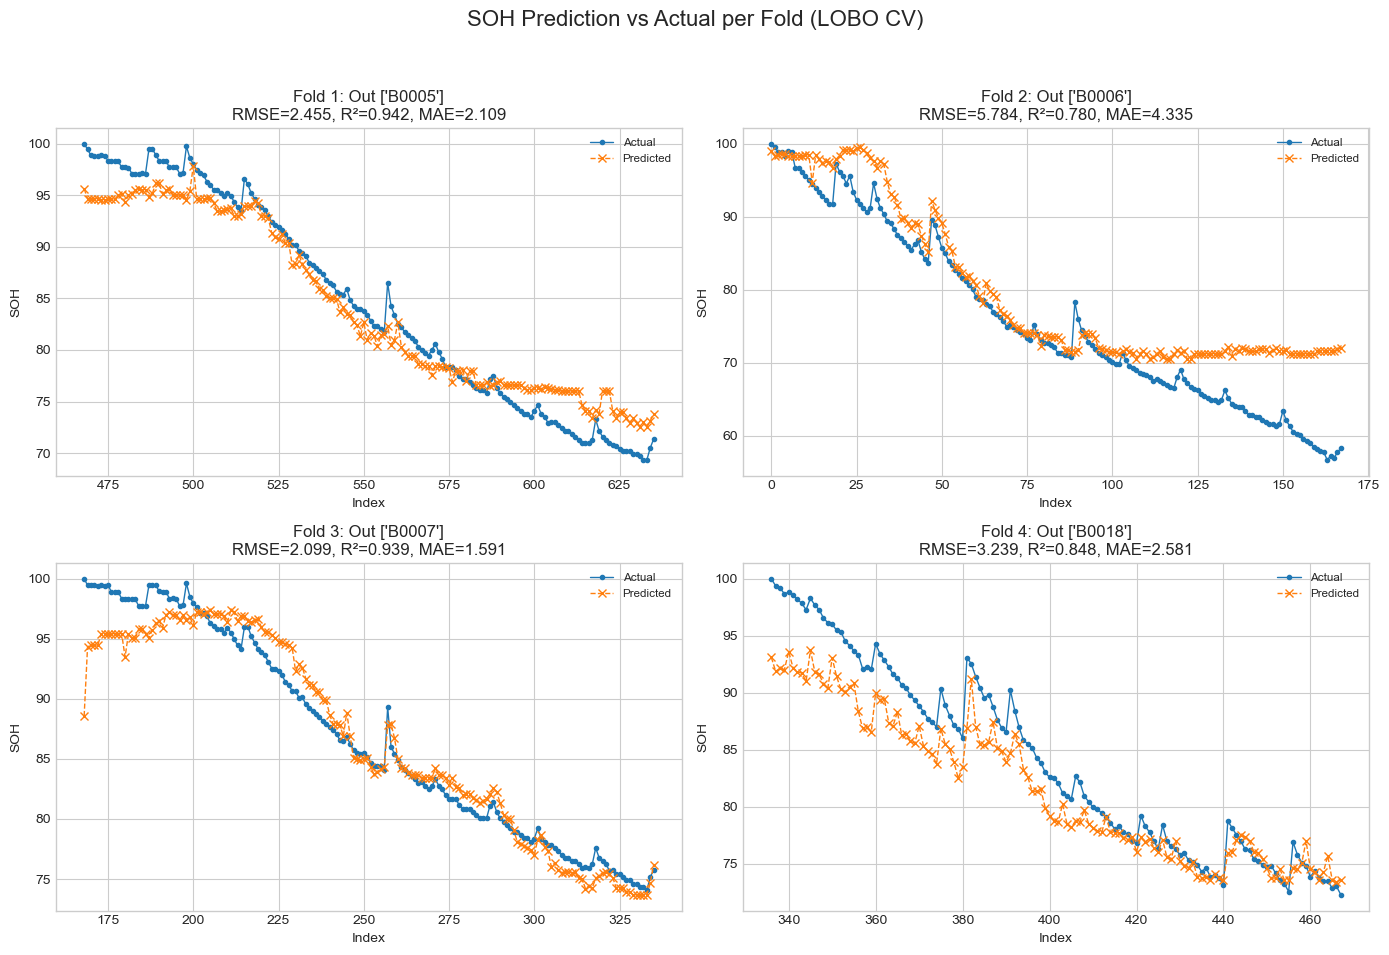


--- Cross-Validation Metrics Summary ---
  Mean R2: 0.8775 +/- 0.0675 
  Mean RMSE: 3.3946 +/- 1.4400 (%)
  Mean MAE: 2.6538 +/- 1.0317 (%)

Initializing CrossValidator for SOH...
CrossValidator initialized for target 'SOH' using LOBO (4 splits).
Model to evaluate: XGBoost

--- Running LOBO CV for target 'SOH' (Plot each fold: True) ---


LOBO Folds:   0%|          | 0/4 [00:00<?, ?it/s]


Training XGBoost model...
XGBoost model training complete.
Predicting with trained XGBoost model...

Training XGBoost model...


LOBO Folds:  50%|█████     | 2/4 [00:00<00:00, 16.91it/s]

XGBoost model training complete.
Predicting with trained XGBoost model...

Training XGBoost model...
XGBoost model training complete.
Predicting with trained XGBoost model...

Training XGBoost model...


LOBO Folds: 100%|██████████| 4/4 [00:00<00:00, 16.58it/s]

XGBoost model training complete.
Predicting with trained XGBoost model...
LOBO Cross-validation loop finished.


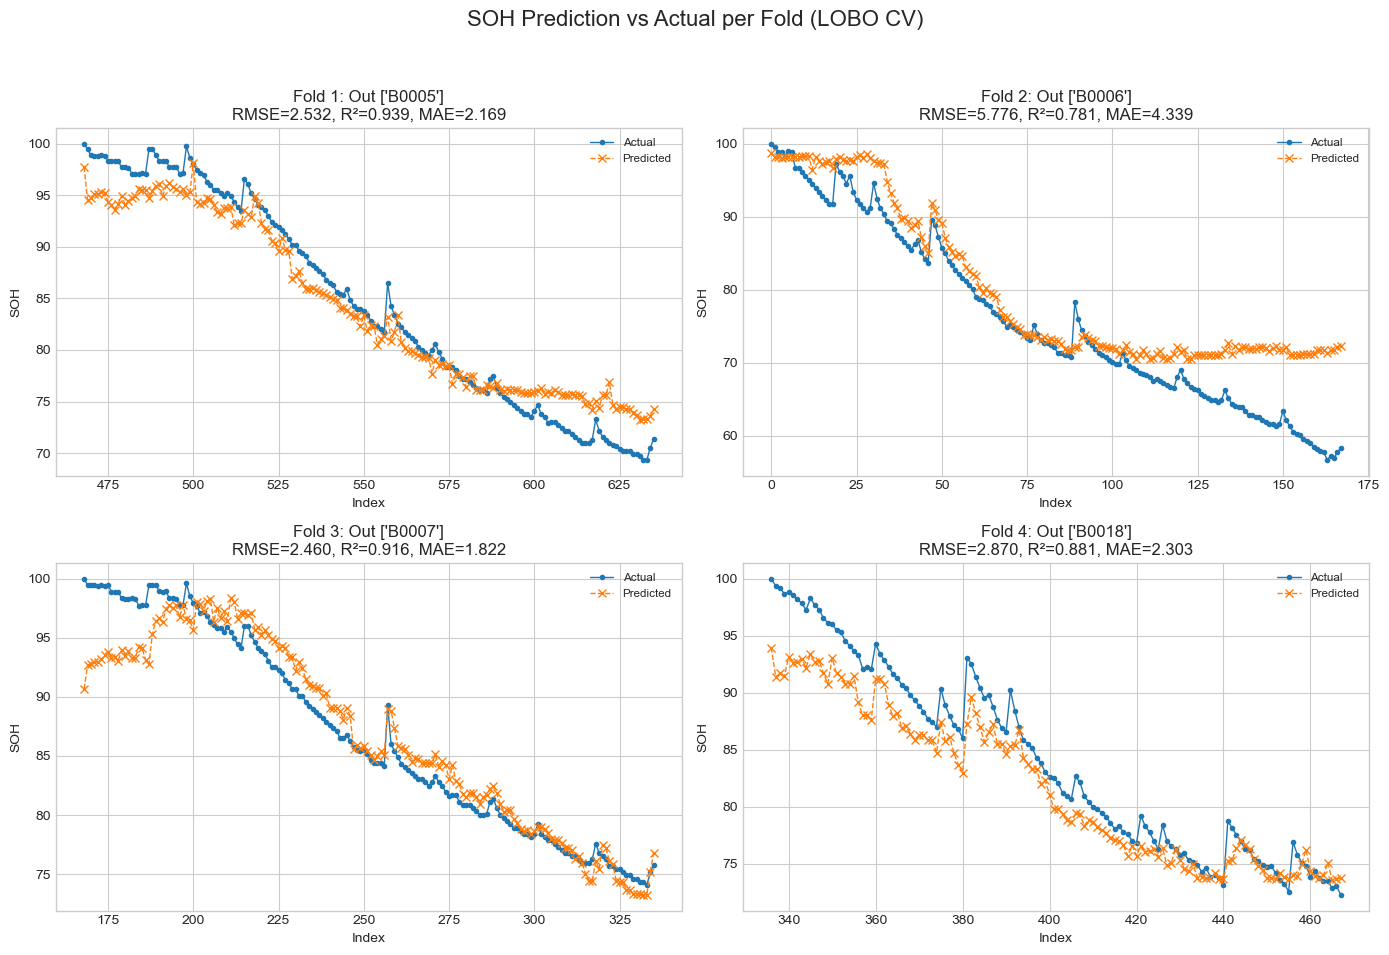


--- Cross-Validation Metrics Summary ---
  Mean R2: 0.8792 +/- 0.0602 
  Mean RMSE: 3.4096 +/- 1.3750 (%)
  Mean MAE: 2.6581 +/- 0.9862 (%)

Initializing CrossValidator for SOH...
CrossValidator initialized for target 'SOH' using LOBO (4 splits).
Model to evaluate: XGBoost

--- Running LOBO CV for target 'SOH' (Plot each fold: True) ---


LOBO Folds:  25%|██▌       | 1/4 [00:00<00:00,  5.58it/s]


Training XGBoost model...
XGBoost model training complete.
Predicting with trained XGBoost model...

Training XGBoost model...


LOBO Folds:  50%|█████     | 2/4 [00:00<00:00,  6.19it/s]

XGBoost model training complete.
Predicting with trained XGBoost model...

Training XGBoost model...


LOBO Folds:  75%|███████▌  | 3/4 [00:00<00:00,  6.42it/s]

XGBoost model training complete.
Predicting with trained XGBoost model...

Training XGBoost model...


LOBO Folds: 100%|██████████| 4/4 [00:00<00:00,  6.42it/s]

XGBoost model training complete.
Predicting with trained XGBoost model...
LOBO Cross-validation loop finished.


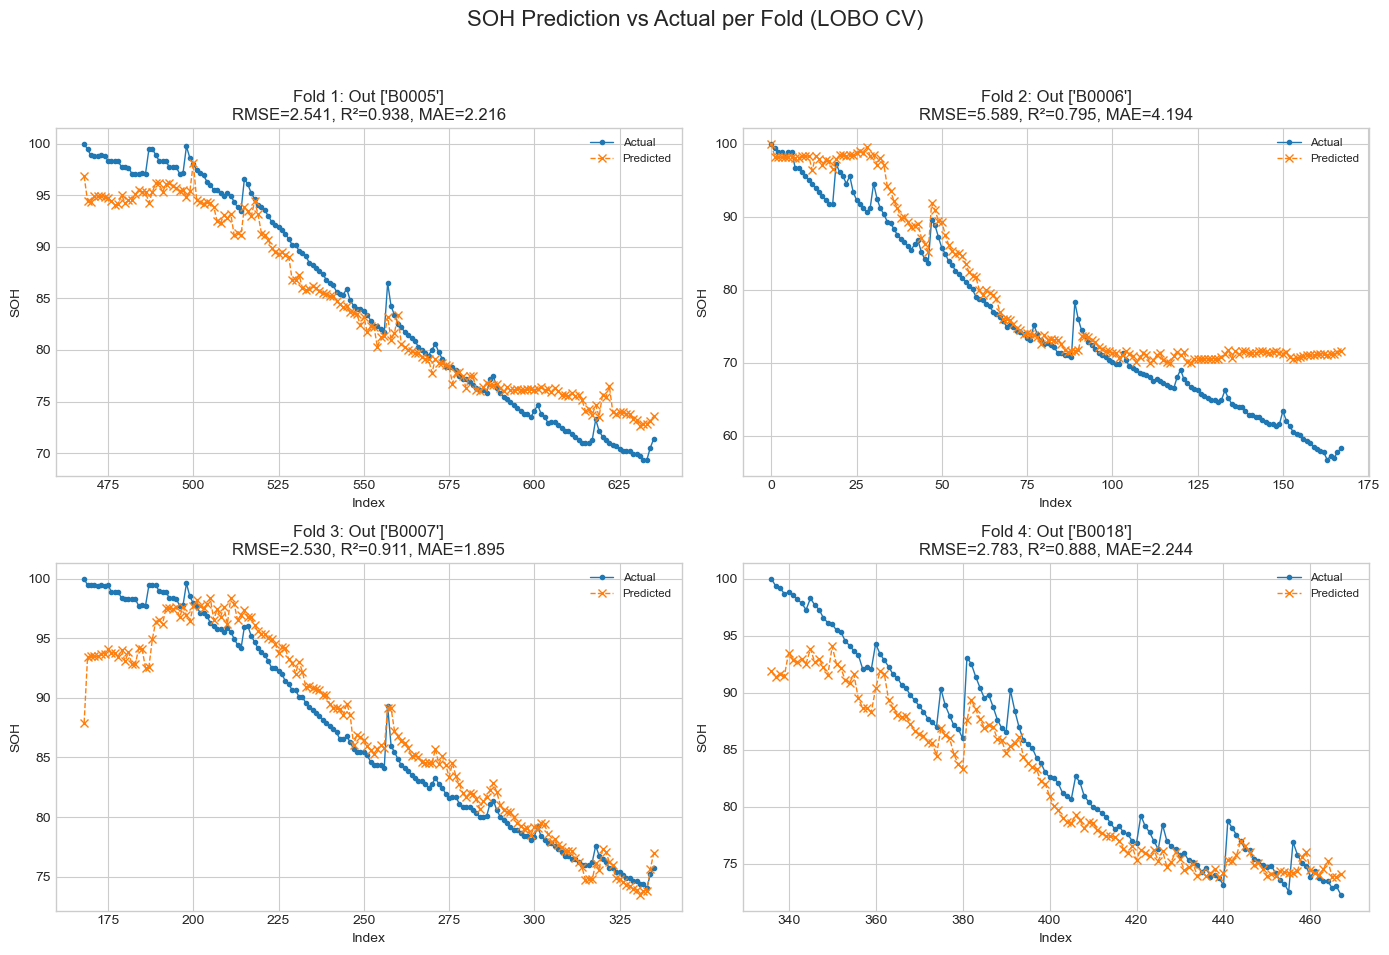


--- Cross-Validation Metrics Summary ---
  Mean R2: 0.8831 +/- 0.0539 
  Mean RMSE: 3.3605 +/- 1.2907 (%)
  Mean MAE: 2.6373 +/- 0.9090 (%)

Initializing CrossValidator for SOH...
CrossValidator initialized for target 'SOH' using LOBO (4 splits).
Model to evaluate: XGBoost

--- Running LOBO CV for target 'SOH' (Plot each fold: True) ---


LOBO Folds:   0%|          | 0/4 [00:00<?, ?it/s]


Training XGBoost model...


LOBO Folds:  25%|██▌       | 1/4 [00:00<00:00,  3.72it/s]

XGBoost model training complete.
Predicting with trained XGBoost model...

Training XGBoost model...


LOBO Folds:  50%|█████     | 2/4 [00:00<00:00,  4.24it/s]

XGBoost model training complete.
Predicting with trained XGBoost model...

Training XGBoost model...


LOBO Folds:  75%|███████▌  | 3/4 [00:00<00:00,  4.13it/s]

XGBoost model training complete.
Predicting with trained XGBoost model...

Training XGBoost model...


LOBO Folds: 100%|██████████| 4/4 [00:00<00:00,  4.13it/s]

XGBoost model training complete.
Predicting with trained XGBoost model...
LOBO Cross-validation loop finished.


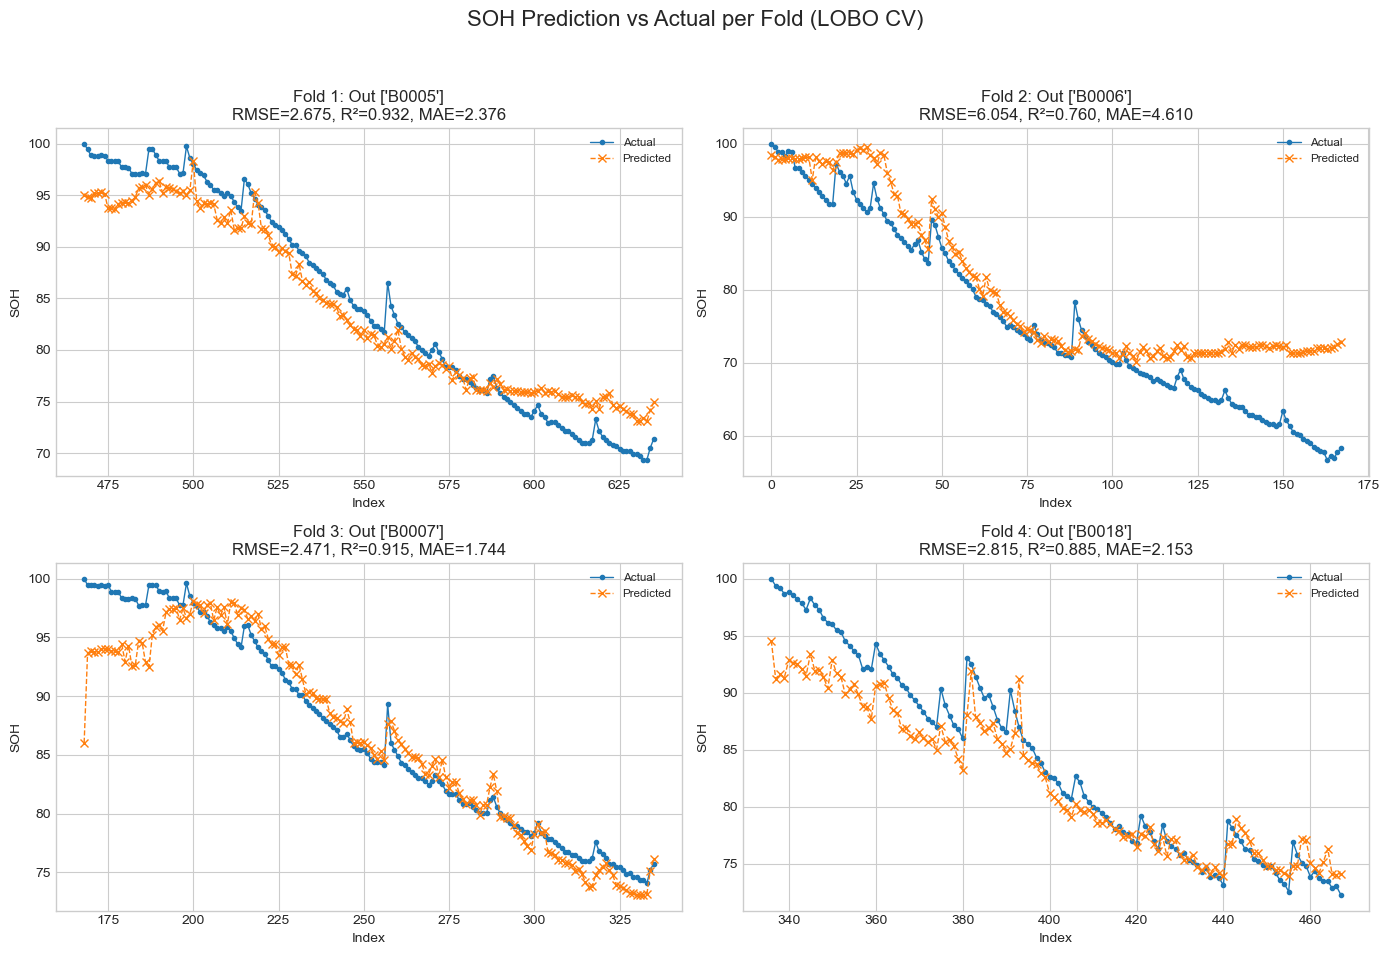


--- Cross-Validation Metrics Summary ---
  Mean R2: 0.8730 +/- 0.0675 
  Mean RMSE: 3.5037 +/- 1.4774 (%)
  Mean MAE: 2.7208 +/- 1.1143 (%)


In [55]:
desired_features = ['Discharge_V_median', 'Discharge_T_std', 'Charge_T_std', 'Time_CC_phase']
print(desired_features)
selector.select(
    method="manual",
    config={'feature_list':desired_features}
)
selected_corr = selector.get_selected_features()
df_selected = selector.get_data_with_selected_features(include_targets=True, include_group=True)
#  Khởi tạo CrossValidator cho SOH
for trainer_cv_plot in trainer_cv_xgb_plots:
    time_col_to_use = 'cycle'
    print("\nInitializing CrossValidator for SOH...")
    cv_soh_plot = CrossValidator(
        data=df_selected,
        feature_cols=selected_corr,
        target_col='SOH',
        group_col='battery_id',
        model_trainer=trainer_cv_plot,
        evaluator=evaluator_cv_plot,
        cv_strategy='LOBO',
        time_col=time_col_to_use # Truyền tên cột cycle (hoặc None)
    )

    # 3. Chạy Cross-Validation và YÊU CẦU VẼ ĐỒ THỊ TỪNG FOLD
    cv_soh_plot.run(plot_each_fold=True) # Đặt thành True

    # 4. Lấy và hiển thị kết quả metrics SOH (đã được in trong get_metrics_summary)
    soh_metrics_summary_plot = cv_soh_plot.get_metrics_summary()

# FINAL RESULT FOR RANDOM FOREST


--- Selecting features using method: manual ---
  Applying manual selection with list: ['Discharge_V_median', 'Discharge_T_std', 'Charge_T_std', 'Time_CC_phase']
--- Feature selection finished. Selected 4 features ---
Selected Features: ['Discharge_V_median', 'Discharge_T_std', 'Charge_T_std', 'Time_CC_phase']

Initializing CrossValidator for SOH...
CrossValidator initialized for target 'SOH' using LOBO (4 splits).
Model to evaluate: RandomForest

--- Running LOBO CV for target 'SOH' (Plot each fold: True) ---


LOBO Folds:   0%|          | 0/4 [00:00<?, ?it/s]


Training RandomForest model...


LOBO Folds:  25%|██▌       | 1/4 [00:00<00:01,  2.13it/s]

RandomForest model training complete.
Predicting with trained RandomForest model...

Training RandomForest model...


LOBO Folds:  50%|█████     | 2/4 [00:00<00:00,  2.10it/s]

RandomForest model training complete.
Predicting with trained RandomForest model...

Training RandomForest model...


LOBO Folds:  75%|███████▌  | 3/4 [00:01<00:00,  2.09it/s]

RandomForest model training complete.
Predicting with trained RandomForest model...

Training RandomForest model...


LOBO Folds: 100%|██████████| 4/4 [00:01<00:00,  2.13it/s]

RandomForest model training complete.
Predicting with trained RandomForest model...
LOBO Cross-validation loop finished.


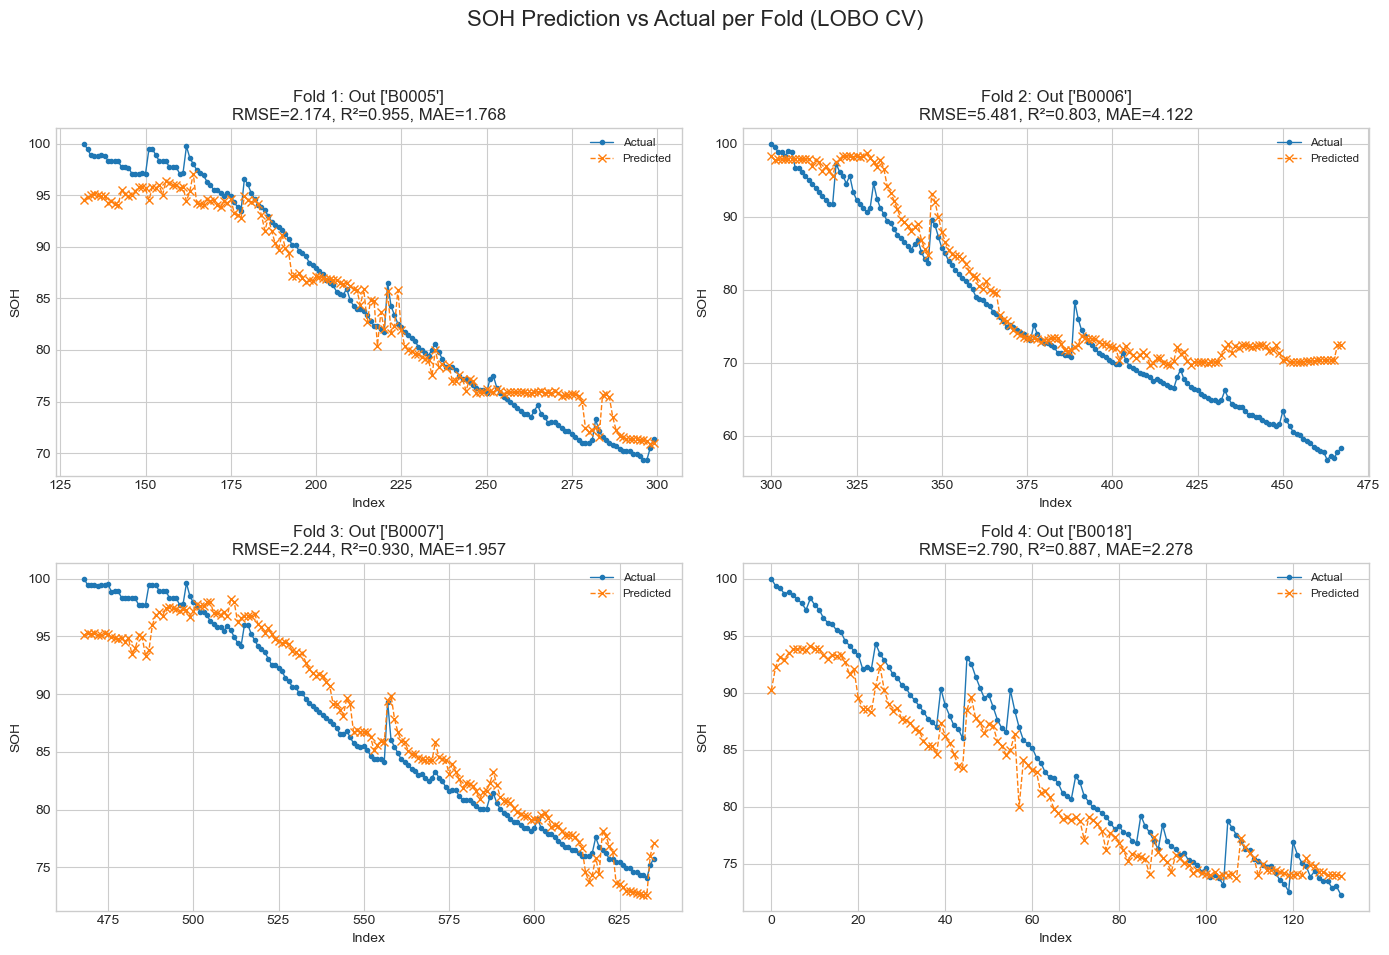


--- Cross-Validation Metrics Summary ---
  Mean RMSE: 3.1725 +/- 1.3541 (%)
  Mean R2: 0.8938 +/- 0.0577 
  Mean MAE: 2.5314 +/- 0.9364 (%)
3.172521275427051


In [21]:
desired_features = ['Discharge_V_median', 'Discharge_T_std', 'Charge_T_std', 'Time_CC_phase']

selector.select(
        method="manual",
        config={'feature_list':desired_features}
)
selected_corr = selector.get_selected_features()
df_selected = selector.get_data_with_selected_features(include_targets=True, include_group=True)
time_col_to_use = 'cycle'
print("\nInitializing CrossValidator for SOH...")
cv_soh_plot = CrossValidator(
    data=df_selected,
    feature_cols=selected_corr,
    target_col='SOH',
    group_col='battery_id',
    model_trainer=trainer_cv_plot_0,
    evaluator=evaluator_cv_plot,
    cv_strategy='LOBO',
    time_col=time_col_to_use # Truyền tên cột cycle (hoặc None)
)
        
# 3. Chạy Cross-Validation và YÊU CẦU VẼ ĐỒ THỊ TỪNG FOLD
data_predicted = cv_soh_plot.run(plot_each_fold=True) # Đặt thành True

# 4. Lấy và hiển thị kết quả metrics SOH (đã được in trong get_metrics_summary)
soh_metrics_summary_plot = cv_soh_plot.get_metrics_summary()
print(soh_metrics_summary_plot['mean']['rmse'])

In [40]:
print(type(data_predicted[1][0]))
data_predicted[1][3].to_csv('./result/soh_lobo/soh_lobo_rf_b0018.csv')

<class 'pandas.core.frame.DataFrame'>


In [37]:
data_predicted[1][1]

,Actual,Predicted,Group,Fold,Index
300,100.000000,98.261093,B0006,2,300
301,99.498985,97.794679,B0006,2,301
302,98.918547,97.843351,B0006,2,302
303,98.916498,97.898650,B0006,2,303
304,98.289755,97.839007,B0006,2,304
...,...,...,...,...,...
463,56.689285,70.340114,B0006,2,463
464,57.209230,70.355777,B0006,2,464
465,56.933921,70.363752,B0006,2,465
466,57.728747,72.354261,B0006,2,466


# FINAL RESULT FOR XGBOOST


--- Selecting features using method: manual ---
  Applying manual selection with list: ['Discharge_V_median', 'Discharge_T_std', 'Charge_T_std', 'Time_CC_phase']
--- Feature selection finished. Selected 4 features ---
Selected Features: ['Discharge_V_median', 'Discharge_T_std', 'Charge_T_std', 'Time_CC_phase']

Initializing CrossValidator for SOH...
CrossValidator initialized for target 'SOH' using LOBO (4 splits).
Model to evaluate: XGBoost

--- Running LOBO CV for target 'SOH' (Plot each fold: True) ---


LOBO Folds:   0%|          | 0/4 [00:00<?, ?it/s]


Training XGBoost model...
XGBoost model training complete.
Predicting with trained XGBoost model...


LOBO Folds:  25%|██▌       | 1/4 [00:00<00:00,  5.58it/s]


Training XGBoost model...


LOBO Folds: 100%|██████████| 4/4 [00:00<00:00, 11.52it/s]


XGBoost model training complete.
Predicting with trained XGBoost model...

Training XGBoost model...
XGBoost model training complete.
Predicting with trained XGBoost model...

Training XGBoost model...
XGBoost model training complete.
Predicting with trained XGBoost model...
LOBO Cross-validation loop finished.


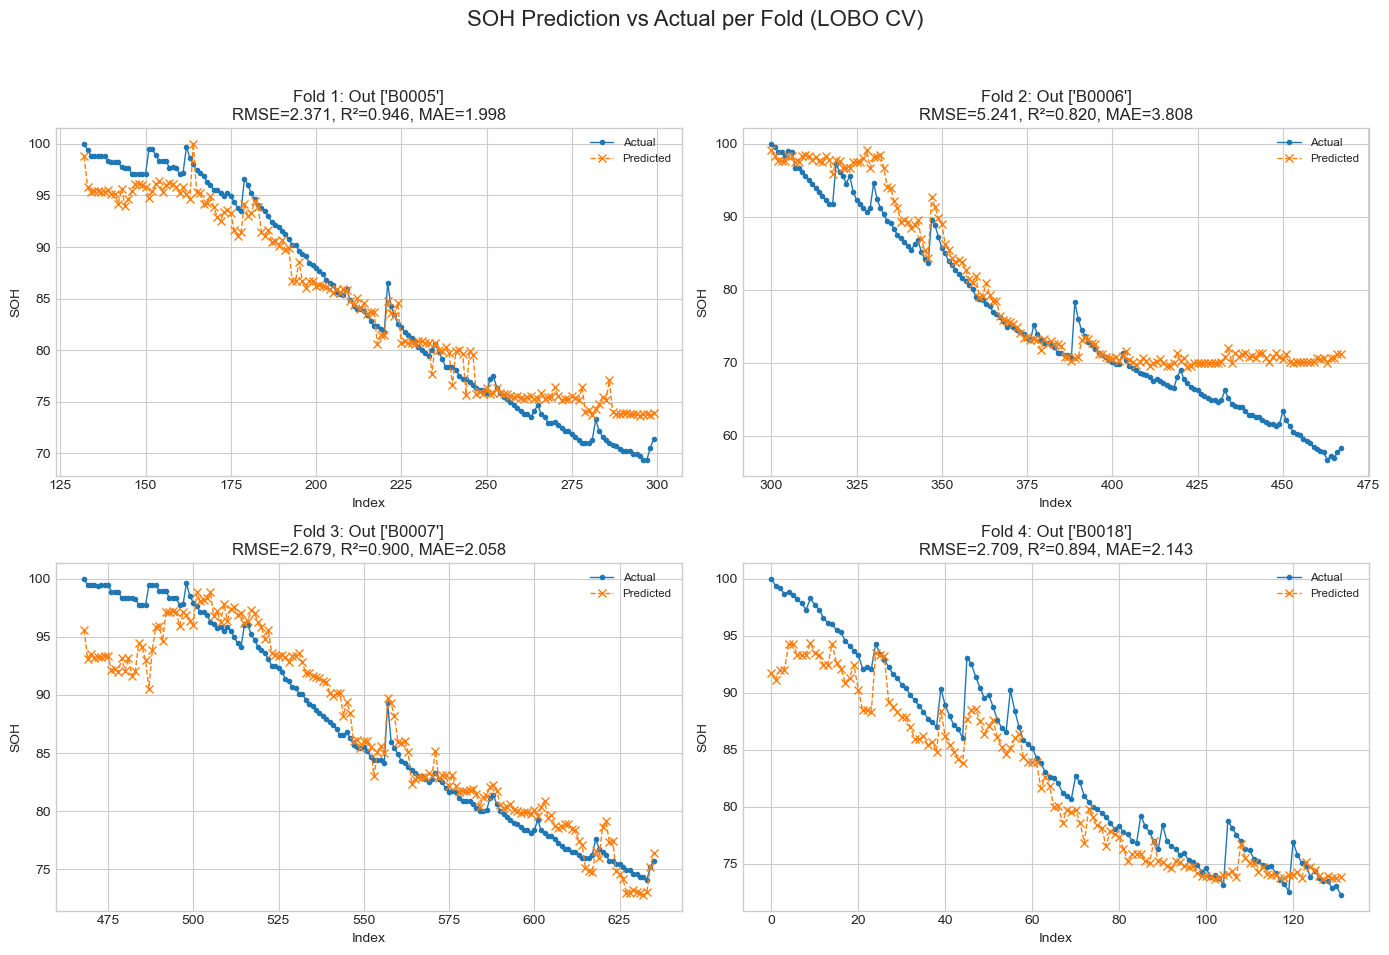


--- Cross-Validation Metrics Summary ---
  Mean RMSE: 3.2500 +/- 1.1570 (%)
  Mean R2: 0.8901 +/- 0.0453 
  Mean MAE: 2.5018 +/- 0.7557 (%)
3.249984616471144


In [28]:
desired_features = ['Discharge_V_median', 'Discharge_T_std', 'Charge_T_std', 'Time_CC_phase']

selector.select(
        method="manual",
        config={'feature_list':desired_features}
)
selected_corr = selector.get_selected_features()
df_selected = selector.get_data_with_selected_features(include_targets=True, include_group=True)
time_col_to_use = 'cycle'
print("\nInitializing CrossValidator for SOH...")
cv_soh_plot = CrossValidator(
    data=df_selected,
    feature_cols=selected_corr,
    target_col='SOH',
    group_col='battery_id',
    model_trainer=trainer_cv_xg_0,
    evaluator=evaluator_cv_plot,
    cv_strategy='LOBO',
    time_col=time_col_to_use # Truyền tên cột cycle (hoặc None)
)
        
# 3. Chạy Cross-Validation và YÊU CẦU VẼ ĐỒ THỊ TỪNG FOLD
data_predicted_xgb = cv_soh_plot.run(plot_each_fold=True) # Đặt thành True

# 4. Lấy và hiển thị kết quả metrics SOH (đã được in trong get_metrics_summary)
soh_metrics_summary_plot = cv_soh_plot.get_metrics_summary()
print(soh_metrics_summary_plot['mean']['rmse'])

In [42]:
print(data_predicted_xgb)

(<cross_validator.CrossValidator object at 0x0000019F6037B0B0>, [         Actual  Predicted  Group  Fold  Index
132  100.000000  98.781891  B0005     1    132
133   99.452721  95.810455  B0005     1    133
134   98.861386  95.338058  B0005     1    134
135   98.856718  95.410820  B0005     1    135
136   98.823482  95.424141  B0005     1    136
..          ...        ...    ...   ...    ...
295   69.672630  73.646049  B0005     1    295
296   69.378514  73.815125  B0005     1    296
297   69.348842  73.796623  B0005     1    297
298   70.510328  73.739296  B0005     1    298
299   71.375616  73.870827  B0005     1    299

[168 rows x 5 columns],          Actual  Predicted  Group  Fold  Index
300  100.000000  99.188339  B0006     2    300
301   99.498985  98.261543  B0006     2    301
302   98.918547  97.631645  B0006     2    302
303   98.916498  97.606194  B0006     2    303
304   98.289755  97.690575  B0006     2    304
..          ...        ...    ...   ...    ...
463   56.689285  

In [50]:
print(type(data_predicted[1][0]))
data_predicted[1][3].to_csv('./result/soh_lobo/soh_lobo_xgb_b0018.csv')

<class 'pandas.core.frame.DataFrame'>


In [49]:
data_predicted_xgb[1][3
                      ]

,Actual,Predicted,Group,Fold,Index
0,100.000000,91.768646,B0018,4,0
1,99.363398,91.147896,B0018,4,1
2,99.169669,92.025681,B0018,4,2
3,98.688364,91.999115,B0018,4,3
4,98.797614,94.251022,B0018,4,4
...,...,...,...,...,...
127,73.462742,73.703423,B0018,4,127
128,73.498749,73.902336,B0018,4,128
129,72.876620,73.737320,B0018,4,129
130,73.034699,73.777092,B0018,4,130
